# <center> BANK CUSTOMERS CHURN ANALYSIS </center>

#### PROBLEM STATEMENT
Customer retention is a crucial aspect of the banking sector, as acquiring new customers can be more costly than retaining existing ones. Churn analysis helps banks identify potential customers at risk of leaving and allows them to take proactive measures to improve customer satisfaction and retention. This report presents an exploratory data analysis (EDA) of a bank churn prediction dataset to uncover patterns and insights that can assist in decision-making.

#### OBJECTIVES
The primary objective of this analysis is to explore the dataset to identify key factors that contribute to customer churn. By analyzing customer demographics, transaction behaviors, account details, and satisfaction metrics, we aim to uncover significant patterns and relationships. This analysis will provide valuable insights to help banks strategize their retention policies effectively.

#### DATSETS OVERVIEW
The dataset consists of 1,000 customer records with 15 attributes, covering various aspects of banking and customer behavior.
Column Descriptions:

Customer_ID - Unique identifier for each customer.

Age - Age of the customer.

Gender - Gender of the customer (Male/Female).

Account_Tenure - Number of years the customer has been with the bank.

Account_Type - Type of bank account (Checking, Savings, Business, etc.).

Balance_Amount - The current balance in the customer’s account.

Num_Transactions_per_Month - Number of transactions the customer performs in a month.

Avg_Transaction_Value - Average value of transactions made by the customer.

Credit_Score - Credit score of the customer, indicating financial health.

Has_Loan - Whether the customer has an existing loan (Yes/No).

Num_Complaints_Last_Year - Number of complaints filed by the customer in the past year.

Satisfaction_Score - Customer's satisfaction rating with the bank’s services.

Num_Calls_Customer_Service - Number of calls made to customer service.

Resolved_Issues_Percentage - Percentage of issues resolved out of the total complaints raised.

Churn_Probability - Whether the customer is likely to churn (Yes/No).

#### Key Questions Raised:

What is the distribution of customer churn based on demographic factors such as age and gender?

How does account tenure impact churn probability?

What is the relationship between credit score and churn likelihood?

How does customer satisfaction score correlate with churn probability?

Do high complaint rates and unresolved issues contribute to increased churn?

#### TOOLS USED 
For this project, we utilized the following tools:
- Python: Main programming language.
     - Pandas: Data manipulation.
     - NumPy: Numerical operations.
- Visualization:
     - Matplotlib & Seaborn: For data visualization.

#### IMPORT LIBRARIES

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from scipy.stats import zscore
import scipy
from scipy.stats import shapiro,chi2,normaltest,kstest
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

#### LOAD DATASETS

In [3]:
df = pd.DataFrame(pd.read_csv(r"C:\Users\hp\Downloads\bank_churn_prediction.csv"))

In [4]:
df

Customer_ID  Age  Gender  Account_Tenure Account_Type  Balance_Amount  \
0           4001   70  Female              27     Checking        47297.64   
1           4002   66  Female              18     Checking        10964.68   
2           4003   31    Male              27     Business        12911.41   
3           4004   31    Male              27      Savings         5134.35   
4           4005   33  Female              16     Business        30317.96   
..           ...  ...     ...             ...          ...             ...   
995         4996   33  Female               1      Savings        40017.36   
996         4997   31  Female              20     Business        41729.35   
997         4998   26  Female               4     Business        15278.71   
998         4999   64  Female               1      Savings        23503.82   
999         5000   24  Female              22     Checking        43703.61   

     Num_Transactions_per_Month  Avg_Transaction_Value  Credit_Score Has_Loan  \
0                            66                 705.93           777       No   
1                             1                5482.34           739       No   
2                            57                 222.61           562      Yes   
3                            30                 165.62           484       No   
4                            58                 513.86           354      Yes   
..                          ...                    ...           ...      ...   
995                          90                 439.75           834       No   
996                          15                2608.08           773       No   
997                          16                 898.75           686       No   
998                          77                 301.33           584       No   
999                          89                 485.60           749       No   

     Num_Complaints_Last_Year  Satisfaction_Score  Num_Calls_Customer_Service  \
0                           1                   5                           2   
1                           8                   2                           9   
2                           6                   5                           5   
3                           4                   2                           3   
4                           6                   2                           6   
..                        ...                 ...                         ...   
995                         9                   5                           7   
996                         4                   3                           9   
997                         0                   2                           1   
998                         4                   1                          11   
999                         8                   2                           8   

     Resolved_Issues_Percentage Churn_Probability  
0                         89.64               Yes  
1                         71.79               Yes  
2                         56.60               Yes  
3                         67.01               Yes  
4                         75.71                No  
..                          ...               ...  
995                       57.43                No  
996                       67.65                No  
997                       66.85               Yes  
998                       87.98                No  
999                       72.20               Yes  

[1000 rows x 15 columns]

#### DATA STUDY AND OVERVIEW

In [5]:
# Basic stats
print(f"Shape :",df.shape)
print("_"*30)
print(f"Size :",df.size)
print("_"*30)
print(f"Columns :",df.columns)
print("_"*30)
print(f"Rows :",df.index)
print("_"*30)
print(f"information :",df.info())
print("_"*30)

Shape : (1000, 15)
______________________________
Size : 15000
______________________________
Columns : Index(['Customer_ID', 'Age', 'Gender', 'Account_Tenure', 'Account_Type',
       'Balance_Amount', 'Num_Transactions_per_Month', 'Avg_Transaction_Value',
       'Credit_Score', 'Has_Loan', 'Num_Complaints_Last_Year',
       'Satisfaction_Score', 'Num_Calls_Customer_Service',
       'Resolved_Issues_Percentage', 'Churn_Probability'],
      dtype='object')
______________________________
Rows : RangeIndex(start=0, stop=1000, step=1)
______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Account_Tenure              1000 non

In [6]:
df.describe()

Customer_ID          Age  Account_Tenure  Balance_Amount  \
count  1000.000000  1000.000000     1000.000000     1000.000000   
mean   4500.500000    48.937000       15.330000    24828.521000   
std     288.819436    17.525586        8.443838    14411.834666   
min    4001.000000    18.000000        1.000000      166.550000   
25%    4250.750000    34.000000        8.000000    12134.822500   
50%    4500.500000    49.000000       16.000000    24518.075000   
75%    4750.250000    64.000000       23.000000    37215.212500   
max    5000.000000    79.000000       29.000000    49942.360000   

       Num_Transactions_per_Month  Avg_Transaction_Value  Credit_Score  \
count                 1000.000000            1000.000000   1000.000000   
mean                    50.024000            1059.804230    579.673000   
std                     28.371083            2041.378058    158.555125   
min                      1.000000               2.920000    300.000000   
25%                     26.000000             250.350000    441.000000   
50%                     50.000000             477.610000    579.000000   
75%                     75.000000             937.947500    720.000000   
max                     99.000000           18157.690000    849.000000   

       Num_Complaints_Last_Year  Satisfaction_Score  \
count               1000.000000         1000.000000   
mean                   4.527000            2.990000   
std                    2.898909            1.371051   
min                    0.000000            1.000000   
25%                    2.000000            2.000000   
50%                    5.000000            3.000000   
75%                    7.000000            4.000000   
max                    9.000000            5.000000   

       Num_Calls_Customer_Service  Resolved_Issues_Percentage  
count                 1000.000000                 1000.000000  
mean                     6.743000                   74.877270  
std                      4.375854                   14.615552  
min                      0.000000                   50.000000  
25%                      3.000000                   62.127500  
50%                      7.000000                   74.830000  
75%                     11.000000                   87.532500  
max                     14.000000                   99.980000

#### CONVERTING DATATYPES FROM OBJECT TO NUMERICAL

In [7]:
df.dtypes

Customer_ID                     int64
Age                             int64
Gender                         object
Account_Tenure                  int64
Account_Type                   object
Balance_Amount                float64
Num_Transactions_per_Month      int64
Avg_Transaction_Value         float64
Credit_Score                    int64
Has_Loan                       object
Num_Complaints_Last_Year        int64
Satisfaction_Score              int64
Num_Calls_Customer_Service      int64
Resolved_Issues_Percentage    float64
Churn_Probability              object
dtype: object

In [8]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [9]:
df['Account_Type'] = le.fit_transform(df['Account_Type'])

In [10]:
df['Has_Loan'] = le.fit_transform(df['Has_Loan'])

In [11]:
df['Churn_Probability'] = le.fit_transform(df['Churn_Probability'])

In [12]:
df['Balance_Amount']=df['Balance_Amount'].astype(int)

In [13]:
df['Avg_Transaction_Value']=df['Avg_Transaction_Value'].astype(int)

In [14]:
df['Resolved_Issues_Percentage']=df['Resolved_Issues_Percentage'].astype(int)

In [15]:
df.dtypes

Customer_ID                   int64
Age                           int64
Gender                        int32
Account_Tenure                int64
Account_Type                  int32
Balance_Amount                int32
Num_Transactions_per_Month    int64
Avg_Transaction_Value         int32
Credit_Score                  int64
Has_Loan                      int32
Num_Complaints_Last_Year      int64
Satisfaction_Score            int64
Num_Calls_Customer_Service    int64
Resolved_Issues_Percentage    int32
Churn_Probability             int32
dtype: object

#### NUMERICAL COLUMN ANALYSIS

In [16]:
num_cols = ['Age','Account_Tenure','Balance_Amount','Num_Transactions_per_Month','Avg_Transaction_Value','Credit_Score',
            'Num_Complaints_Last_Year','Satisfaction_Score','Num_Calls_Customer_Service','Resolved_Issues_Percentage']

for col in num_cols:
    print(f"\n{col} Analysis")
    print(f"Mean:", df[col].mean())
    print(f"Median:", df[col].median())
    print(f"Mode:", df[col].mode()[0])
    print(f"Variance:{df[col].var()}")
    print(f"Standard Deviation:{df[col].std()}")
    print(f"Data_Range:{df[col].max() - df[col].min()}")
    print(f"Skewness :", df[col].skew())

    print("_"*30)


Age Analysis
Mean: 48.937
Median: 49.0
Mode: 31
Variance:307.1461771771777
Standard Deviation:17.525586357585237
Data_Range:61
Skewness : -0.026678604917584867
______________________________

Account_Tenure Analysis
Mean: 15.33
Median: 16.0
Mode: 20
Variance:71.2983983983985
Standard Deviation:8.44383789508056
Data_Range:28
Skewness : -0.06831873701515645
______________________________

Balance_Amount Analysis
Mean: 24828.03
Median: 24517.5
Mode: 1330
Variance:207701320.94804814
Standard Deviation:14411.84654886556
Data_Range:49776
Skewness : 0.039959228013512926
______________________________

Num_Transactions_per_Month Analysis
Mean: 50.024
Median: 50.0
Mode: 31
Variance:804.9183423423424
Standard Deviation:28.371082854595848
Data_Range:98
Skewness : 0.0006547723994950308
______________________________

Avg_Transaction_Value Analysis
Mean: 1059.299
Median: 477.0
Mode: 27
Variance:4167268.1197187128
Standard Deviation:2041.3887723113187
Data_Range:18155
Skewness : 4.913134222834755
_

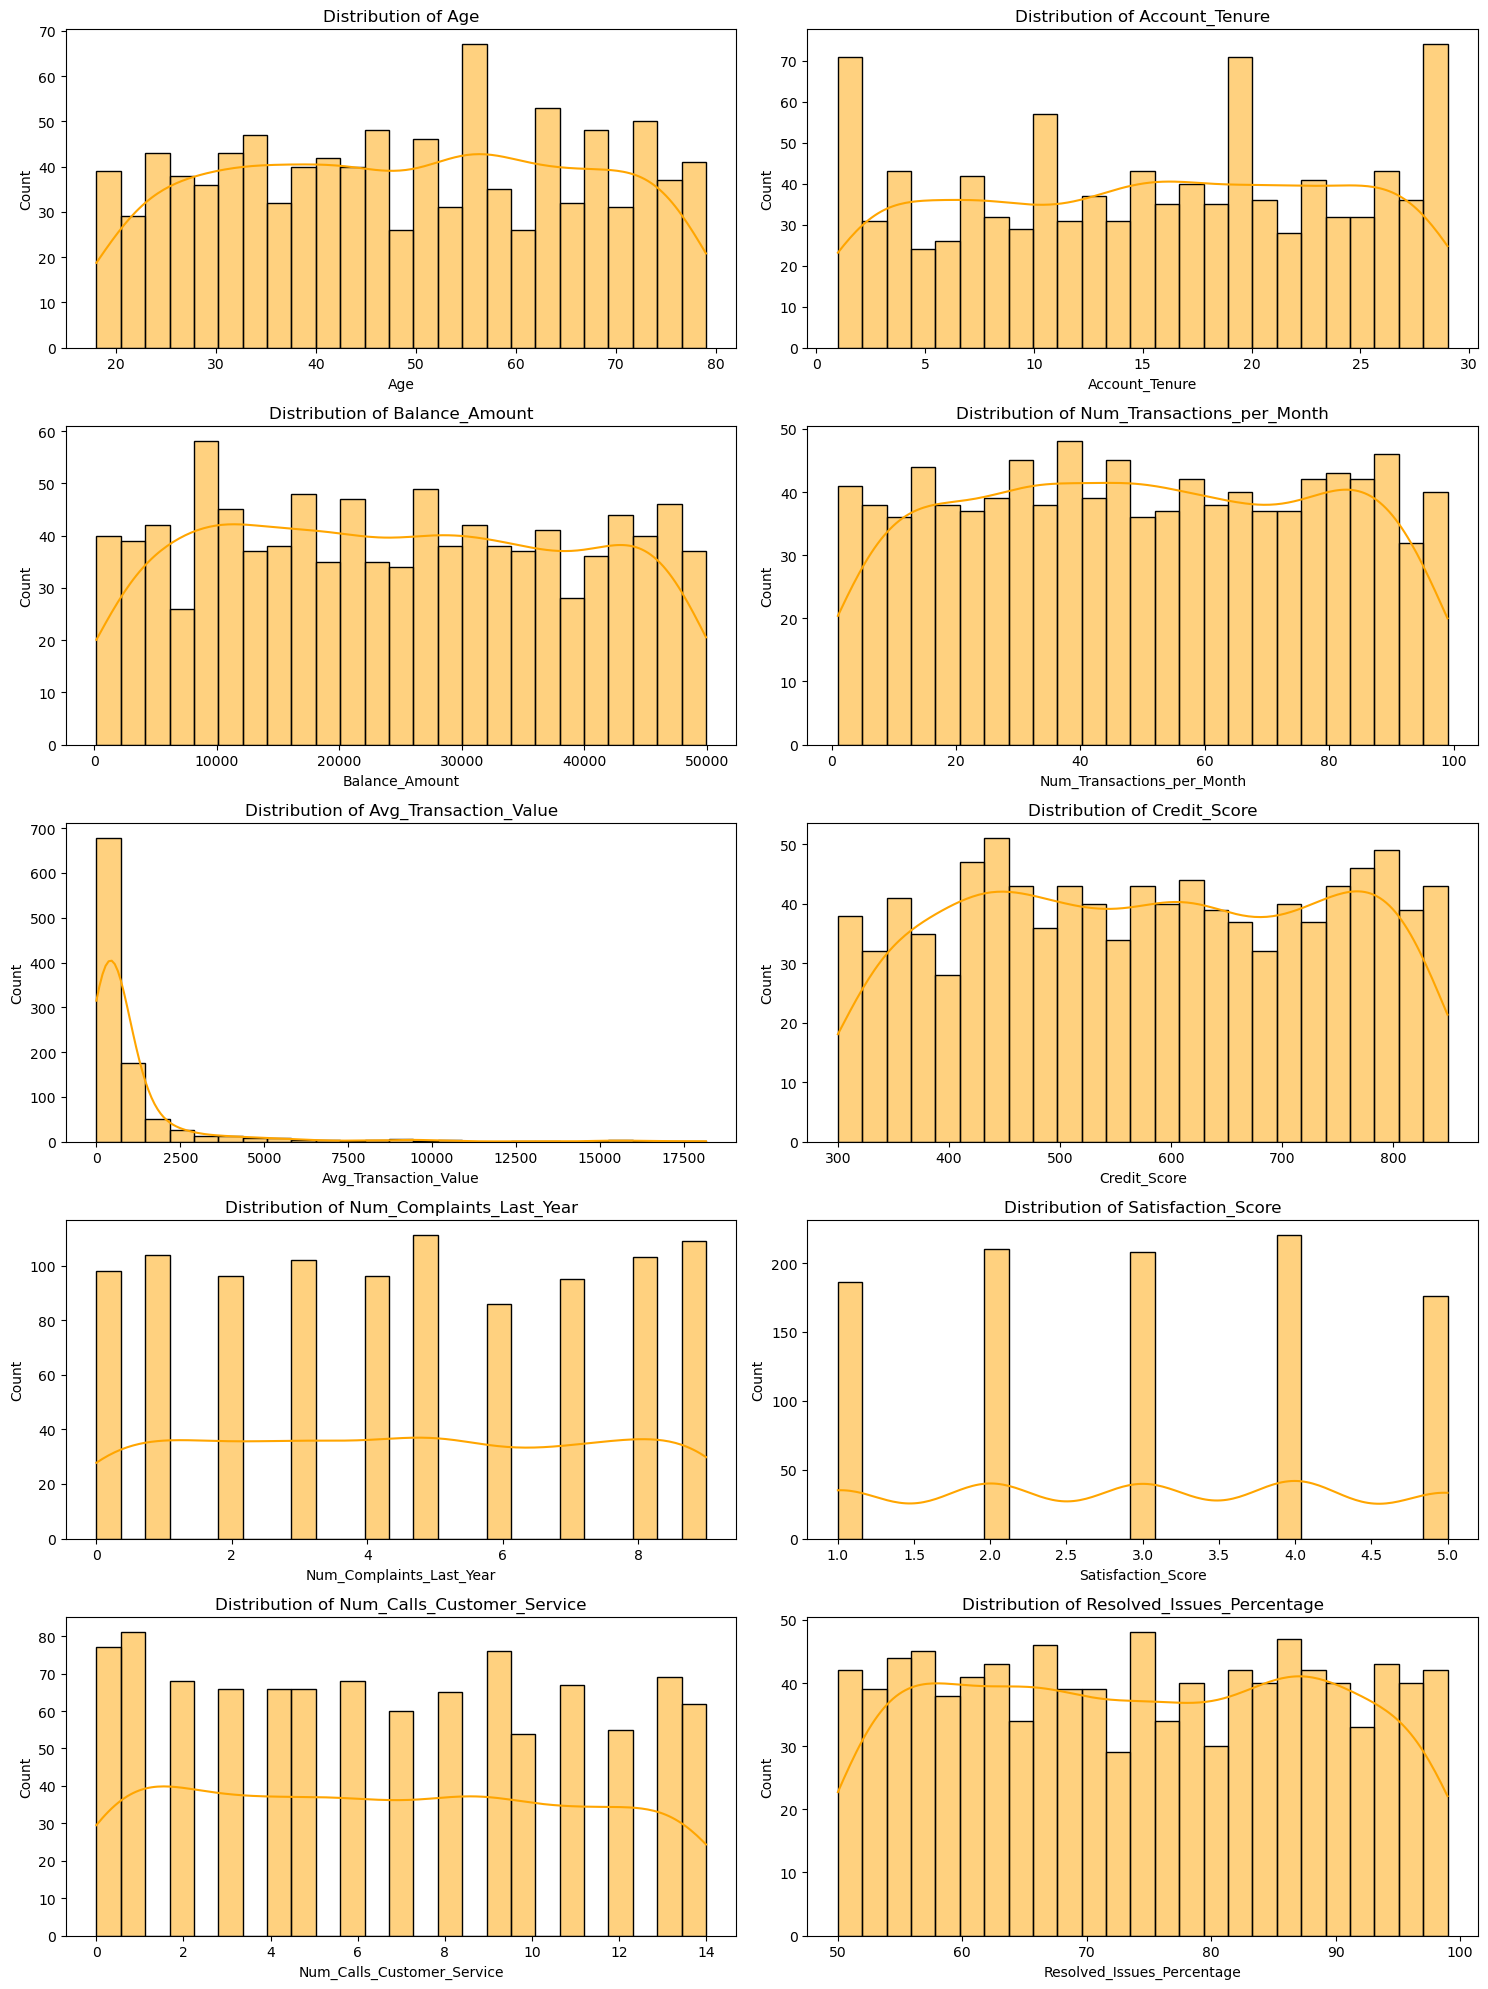

In [17]:
num_cols = ['Age','Account_Tenure','Balance_Amount','Num_Transactions_per_Month','Avg_Transaction_Value','Credit_Score',
            'Num_Complaints_Last_Year','Satisfaction_Score','Num_Calls_Customer_Service','Resolved_Issues_Percentage']

fig, axes = plt.subplots(5,2, figsize=(15, 20))

axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=25, color="Orange", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

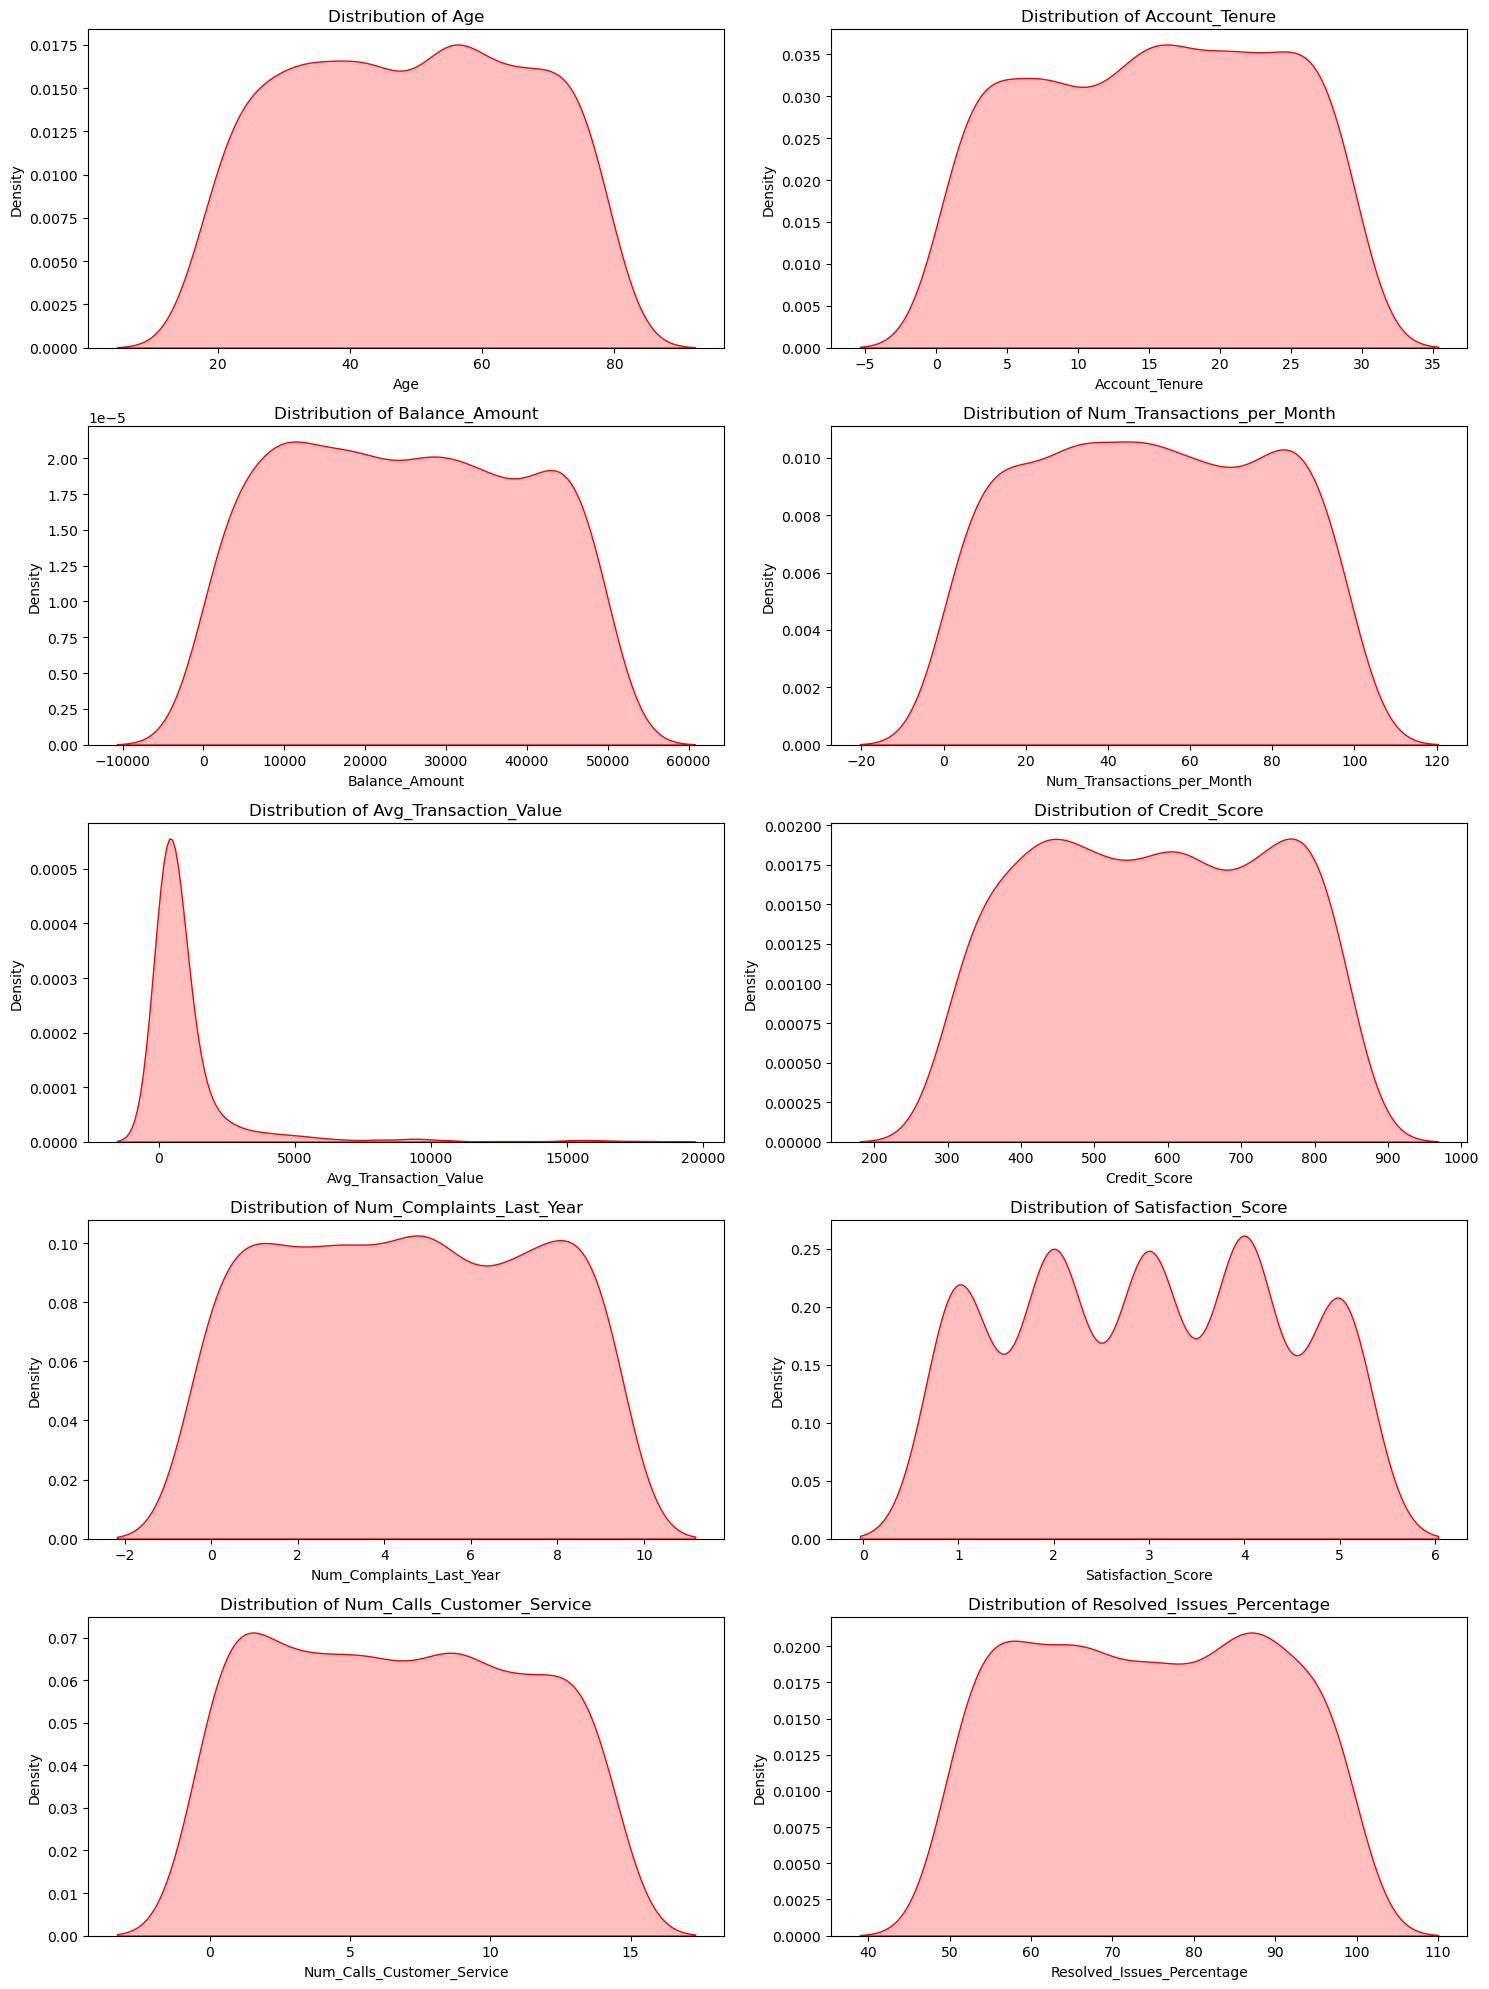

In [18]:
num_cols = ['Age','Account_Tenure','Balance_Amount','Num_Transactions_per_Month','Avg_Transaction_Value','Credit_Score',
            'Num_Complaints_Last_Year','Satisfaction_Score','Num_Calls_Customer_Service','Resolved_Issues_Percentage']

fig, axes = plt.subplots(5,2, figsize=(15, 20))

axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.kdeplot(df[col],fill=True,color="Red", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

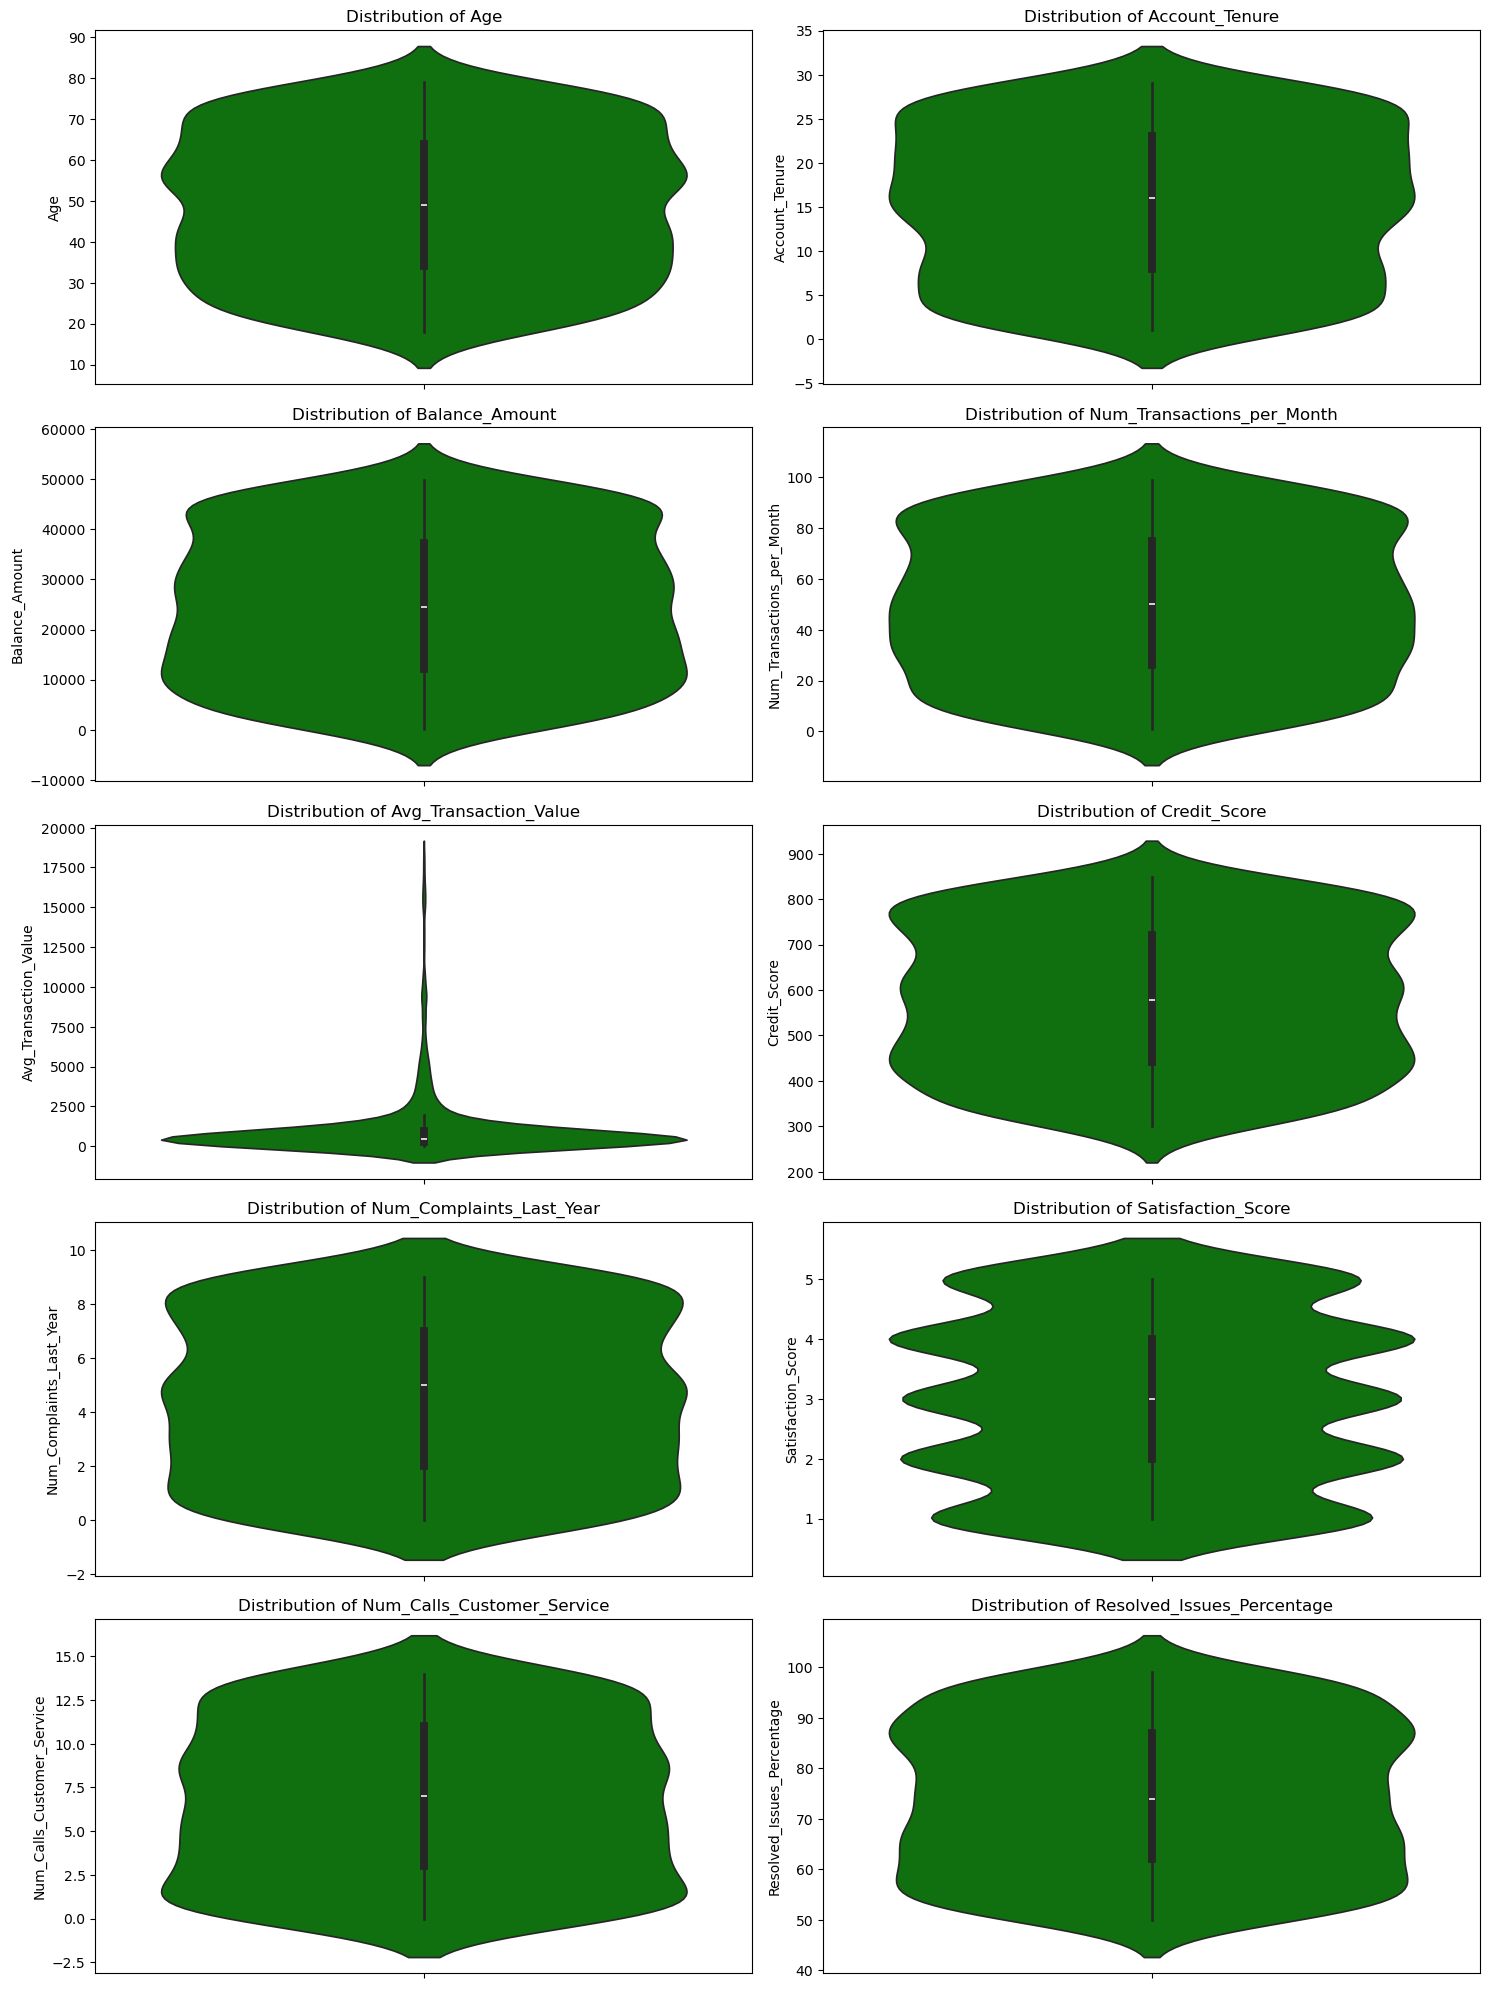

In [19]:
num_cols = ['Age','Account_Tenure','Balance_Amount','Num_Transactions_per_Month','Avg_Transaction_Value','Credit_Score',
            'Num_Complaints_Last_Year','Satisfaction_Score','Num_Calls_Customer_Service','Resolved_Issues_Percentage']

fig, axes = plt.subplots(5,2, figsize=(15, 20))

axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.violinplot(df[col],color="green", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

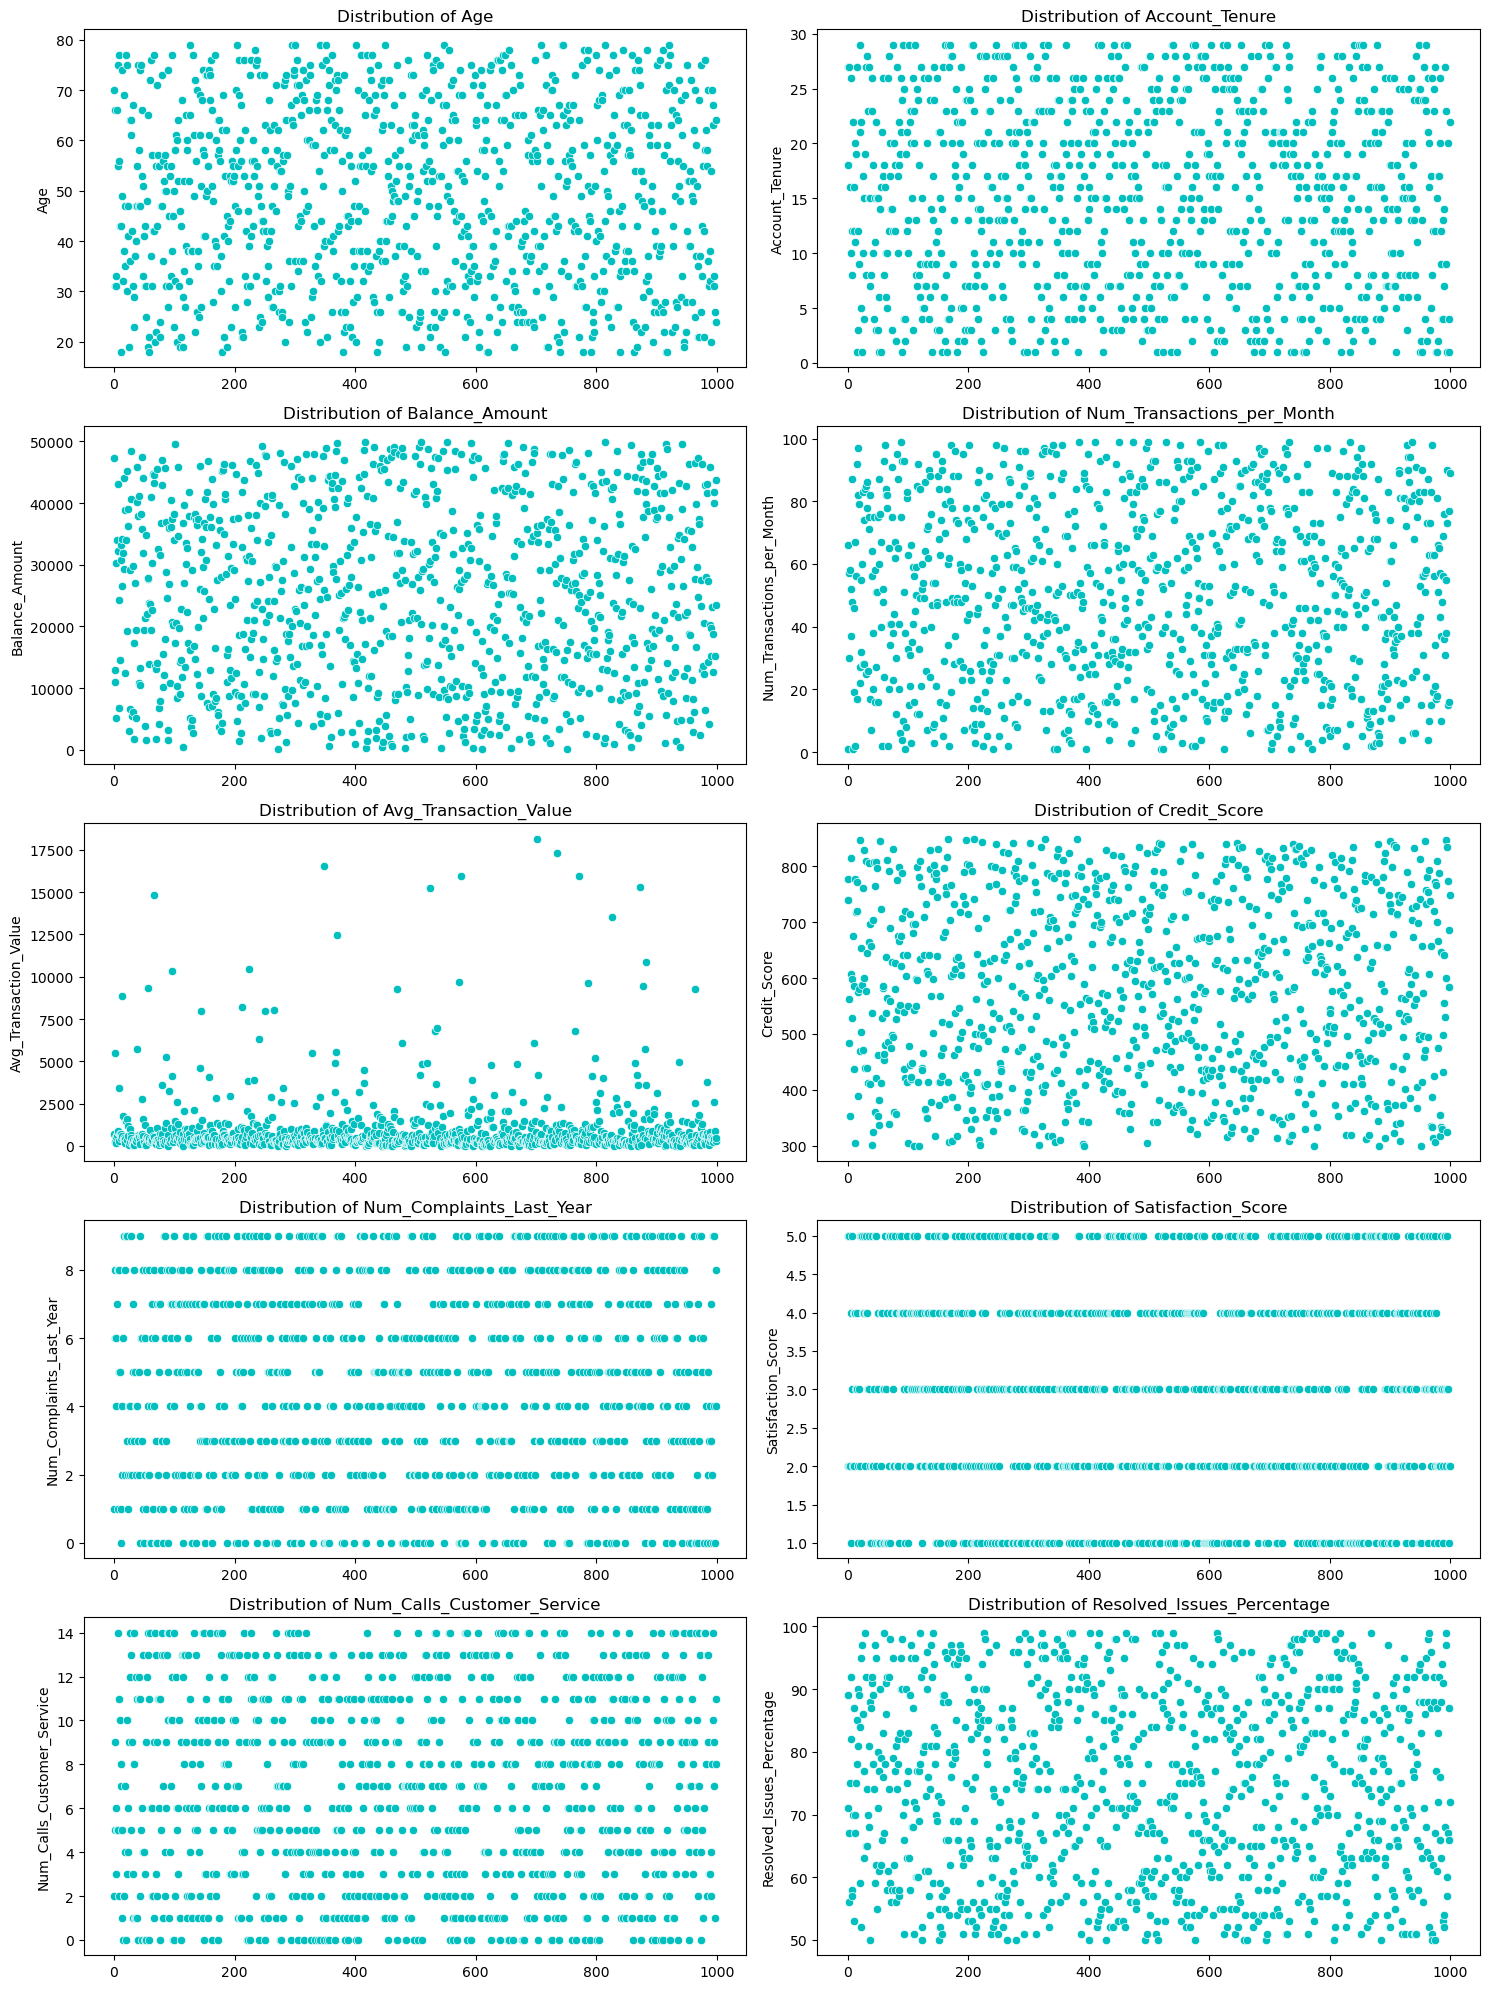

In [20]:
num_cols = ['Age','Account_Tenure','Balance_Amount','Num_Transactions_per_Month','Avg_Transaction_Value','Credit_Score',
            'Num_Complaints_Last_Year','Satisfaction_Score','Num_Calls_Customer_Service','Resolved_Issues_Percentage']

fig, axes = plt.subplots(5,2, figsize=(15, 20))

axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.scatterplot(df[col],color="c", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

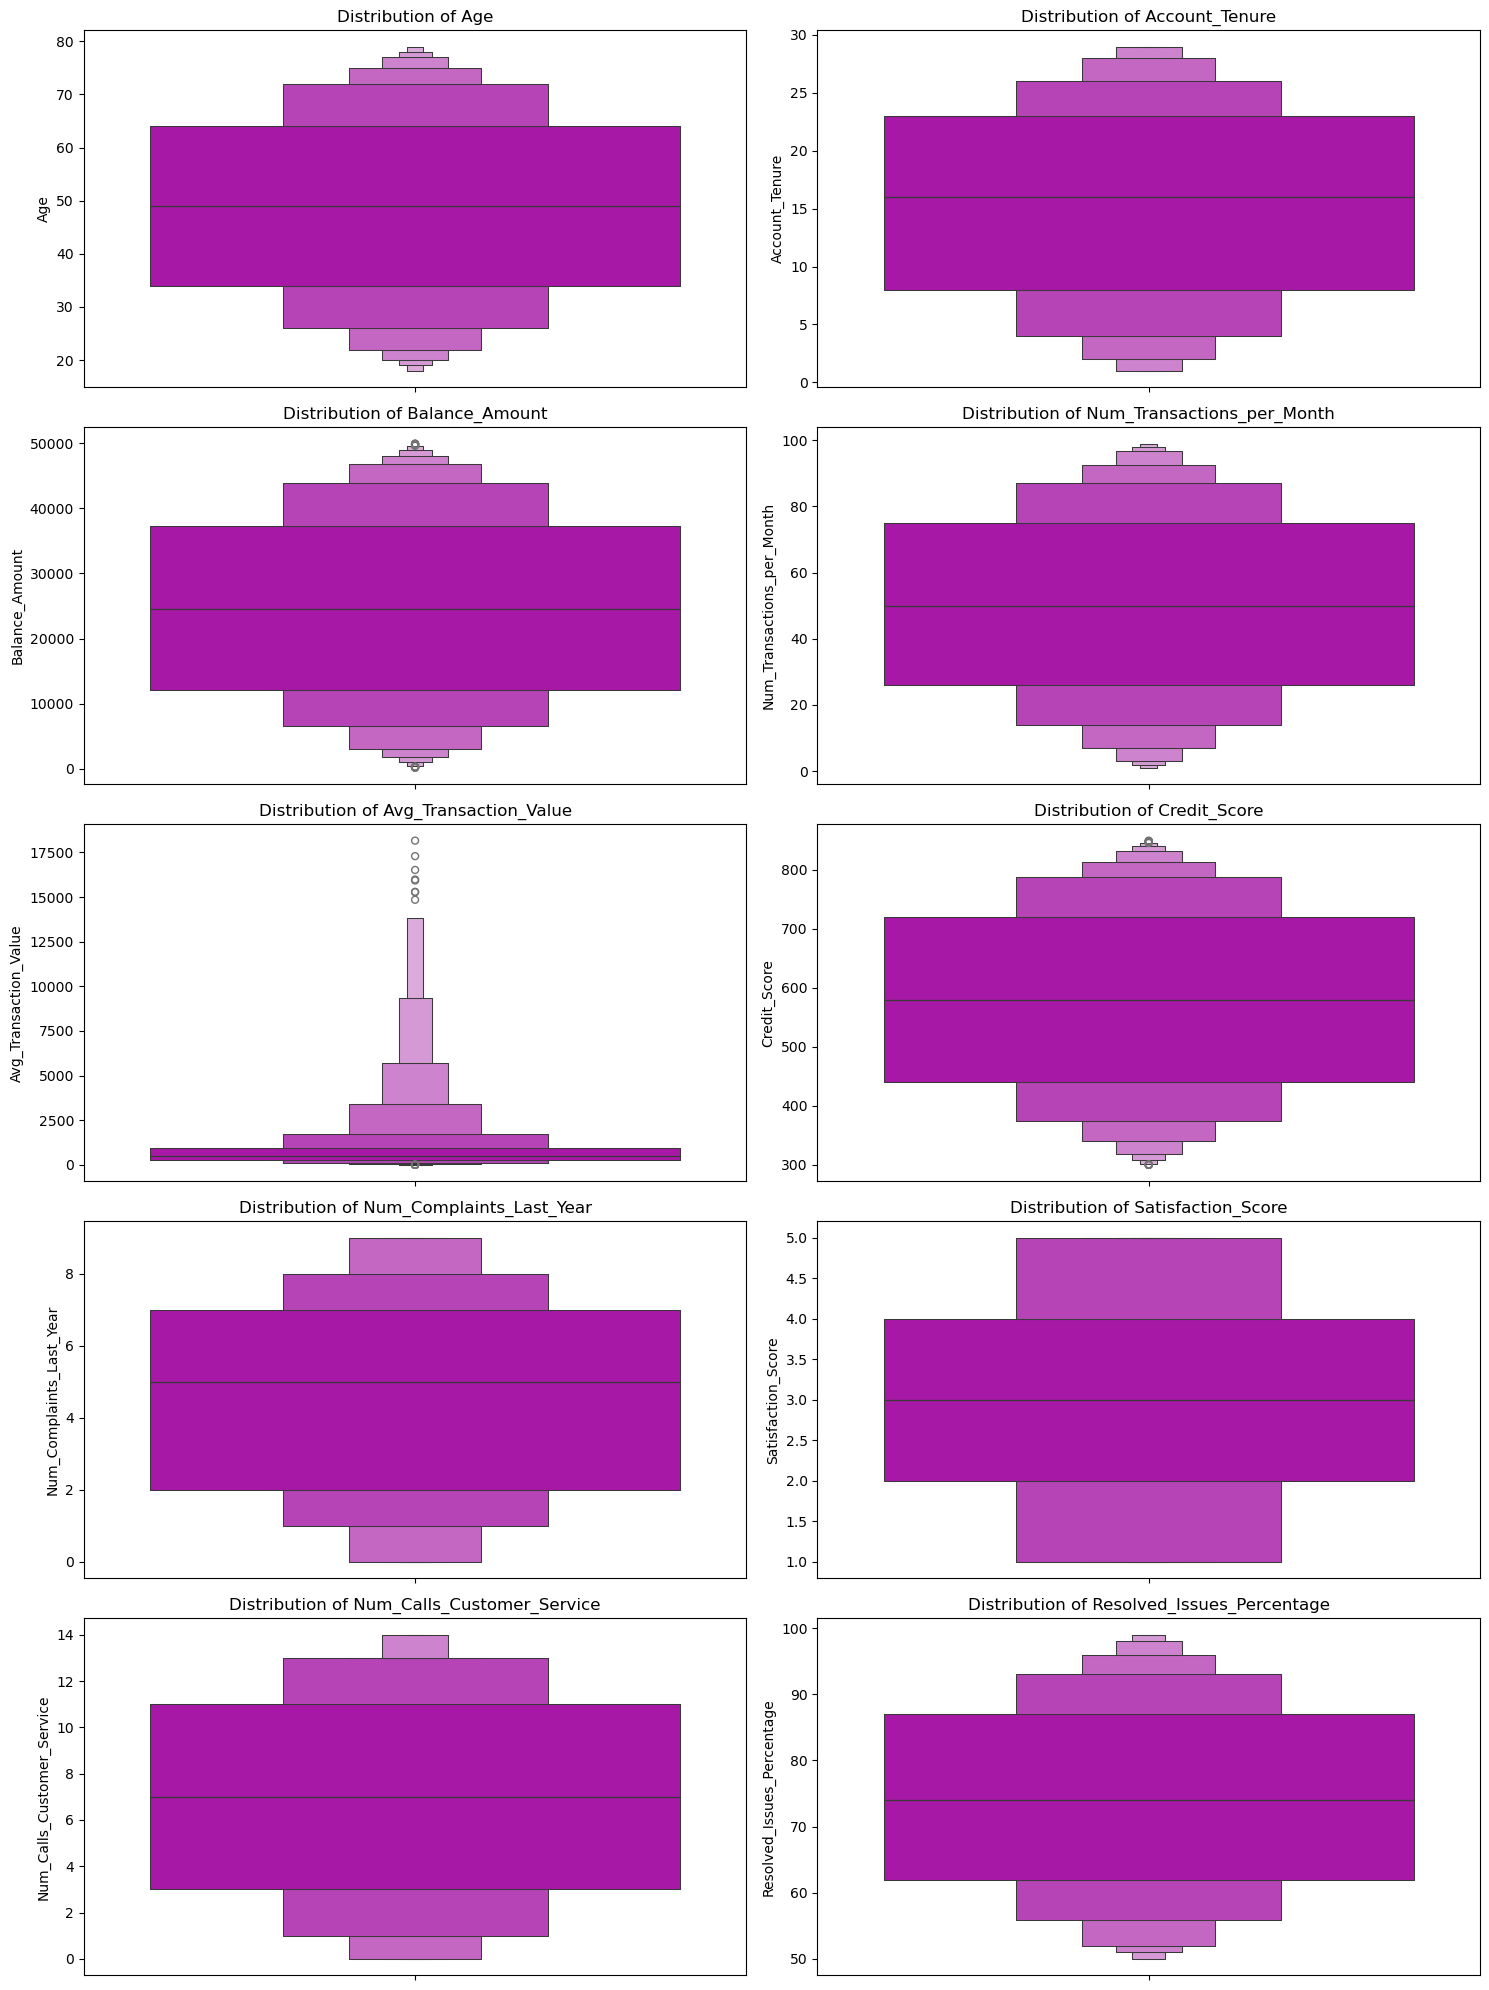

In [21]:
num_cols = ['Age','Account_Tenure','Balance_Amount','Num_Transactions_per_Month','Avg_Transaction_Value','Credit_Score',
            'Num_Complaints_Last_Year','Satisfaction_Score','Num_Calls_Customer_Service','Resolved_Issues_Percentage']

fig, axes = plt.subplots(5,2, figsize=(15, 20))

axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxenplot(df[col],color="m", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

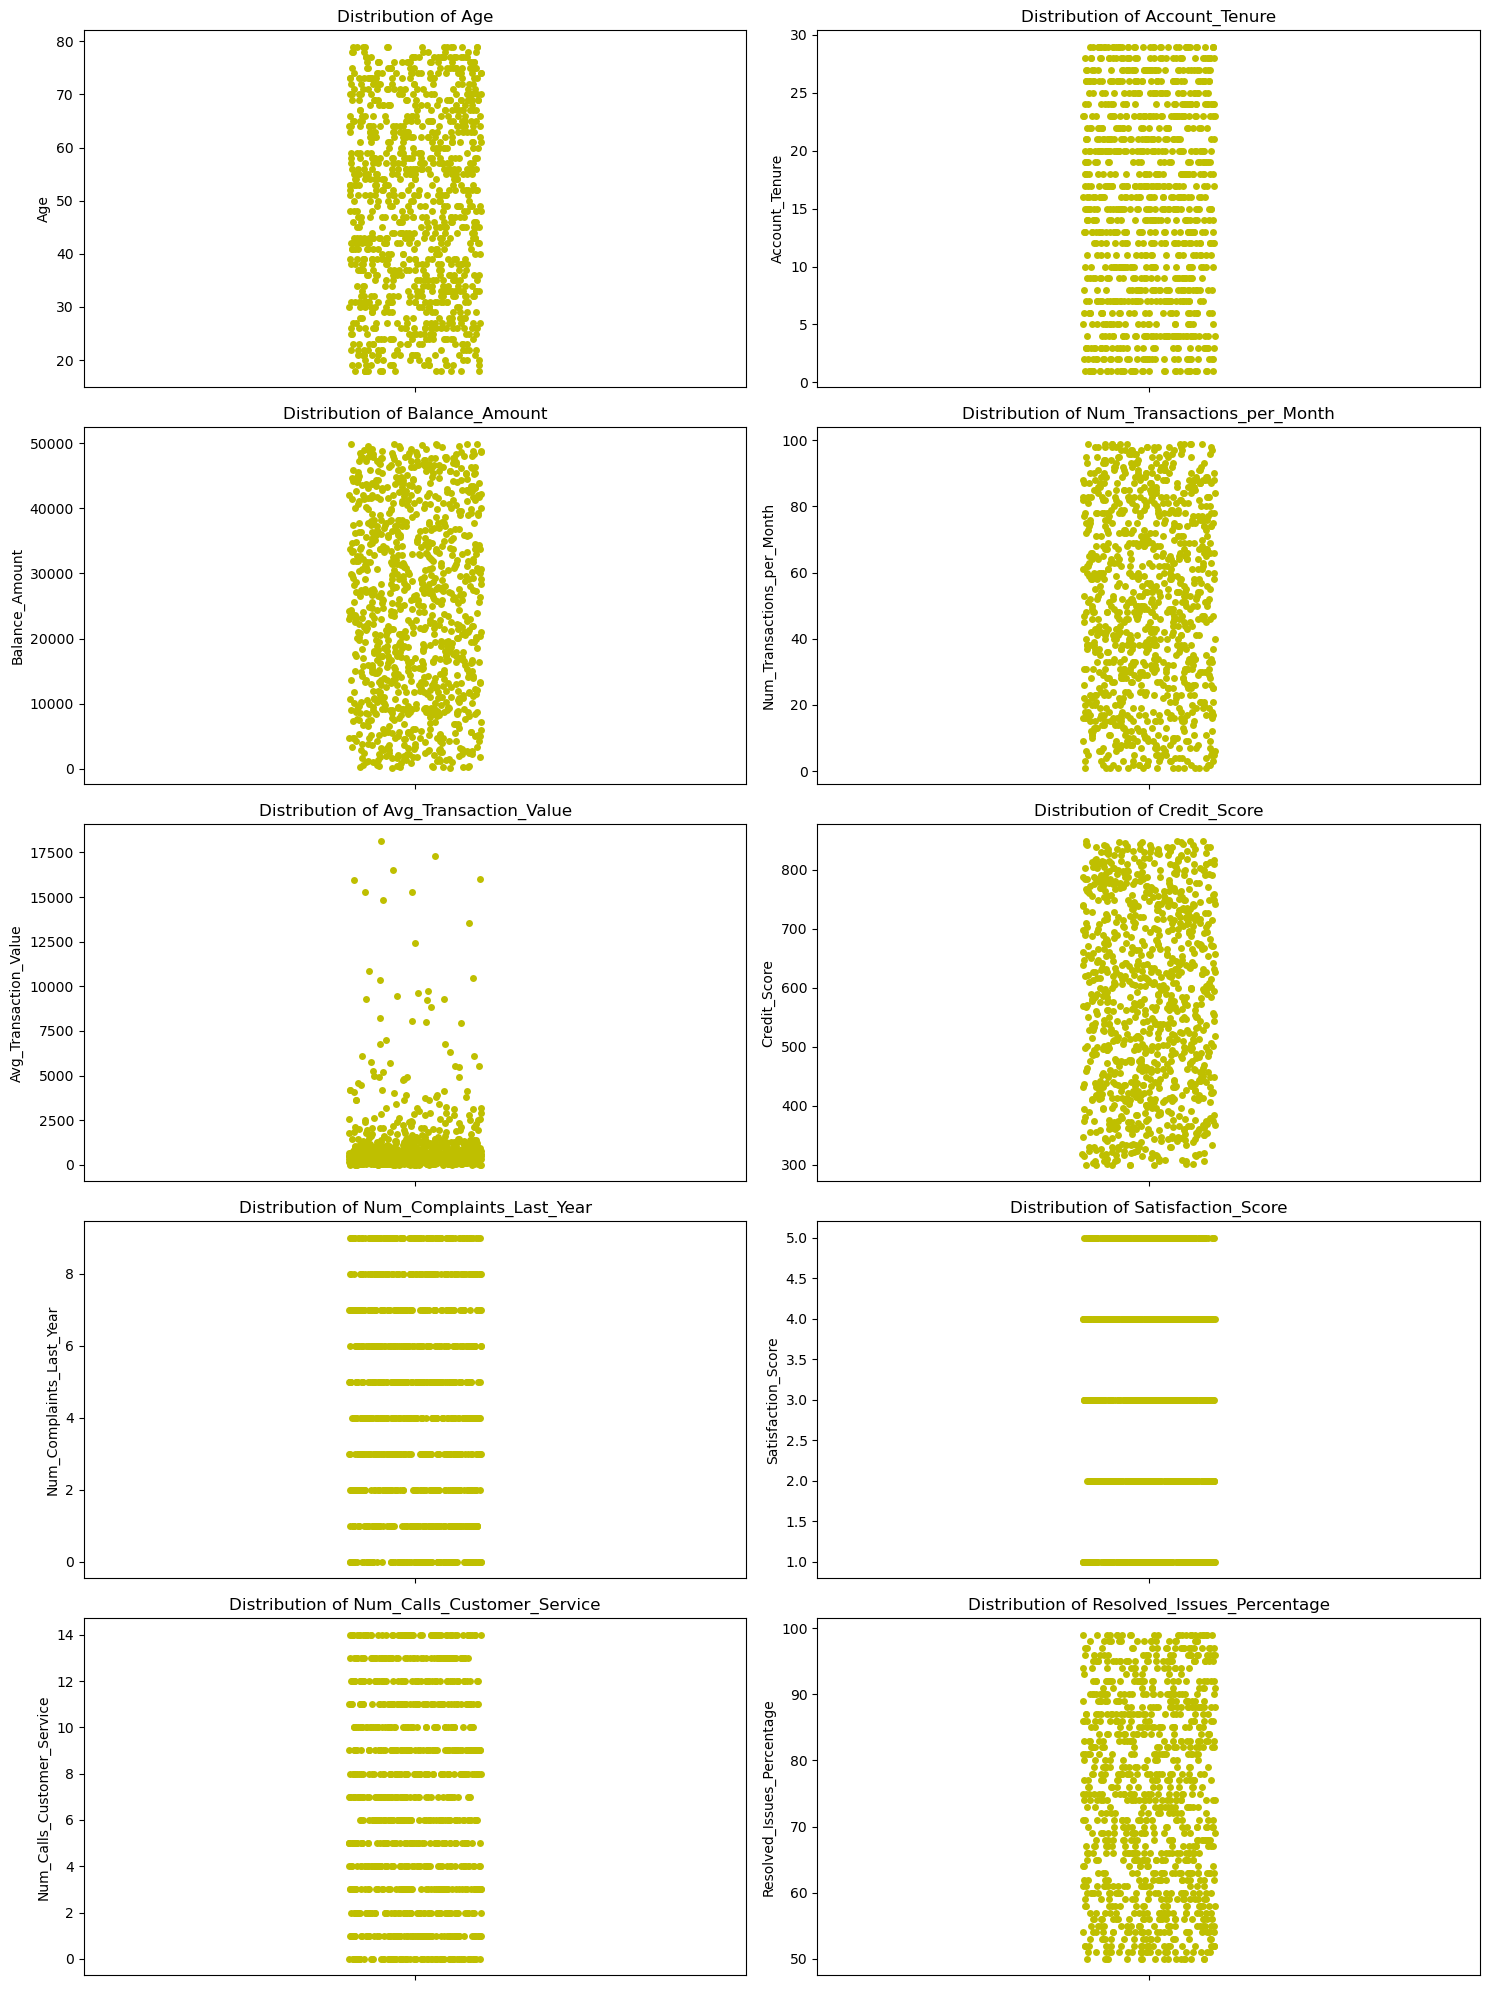

In [22]:
num_cols = ['Age','Account_Tenure','Balance_Amount','Num_Transactions_per_Month','Avg_Transaction_Value','Credit_Score',
            'Num_Complaints_Last_Year','Satisfaction_Score','Num_Calls_Customer_Service','Resolved_Issues_Percentage']

fig, axes = plt.subplots(5,2, figsize=(15, 20))

axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.stripplot(df[col],color="y", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

#### CATEGORICAL COLUMN ANALYSIS

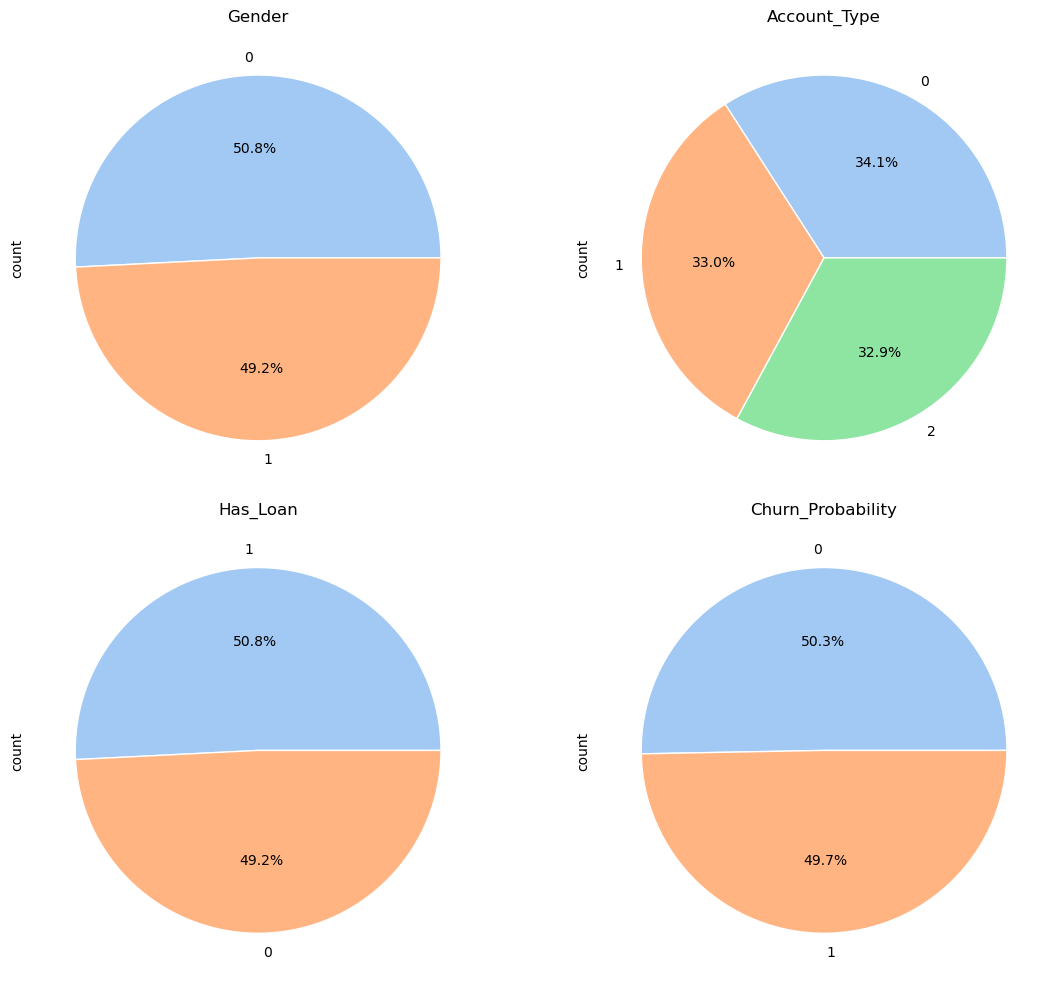

In [23]:
cat_cols = ['Gender','Account_Type','Has_Loan','Churn_Probability']
fig, axs = plt.subplots(2, 2, figsize=(12,10))

axs = axs.flatten()
for i, c in enumerate(cat_cols):
    colors = sns.color_palette('pastel')
    df[c].value_counts().plot.pie(ax=axs[i], autopct='%1.1f%%', colors=colors,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    axs[i].set_title(c)

plt.tight_layout()
plt.show()

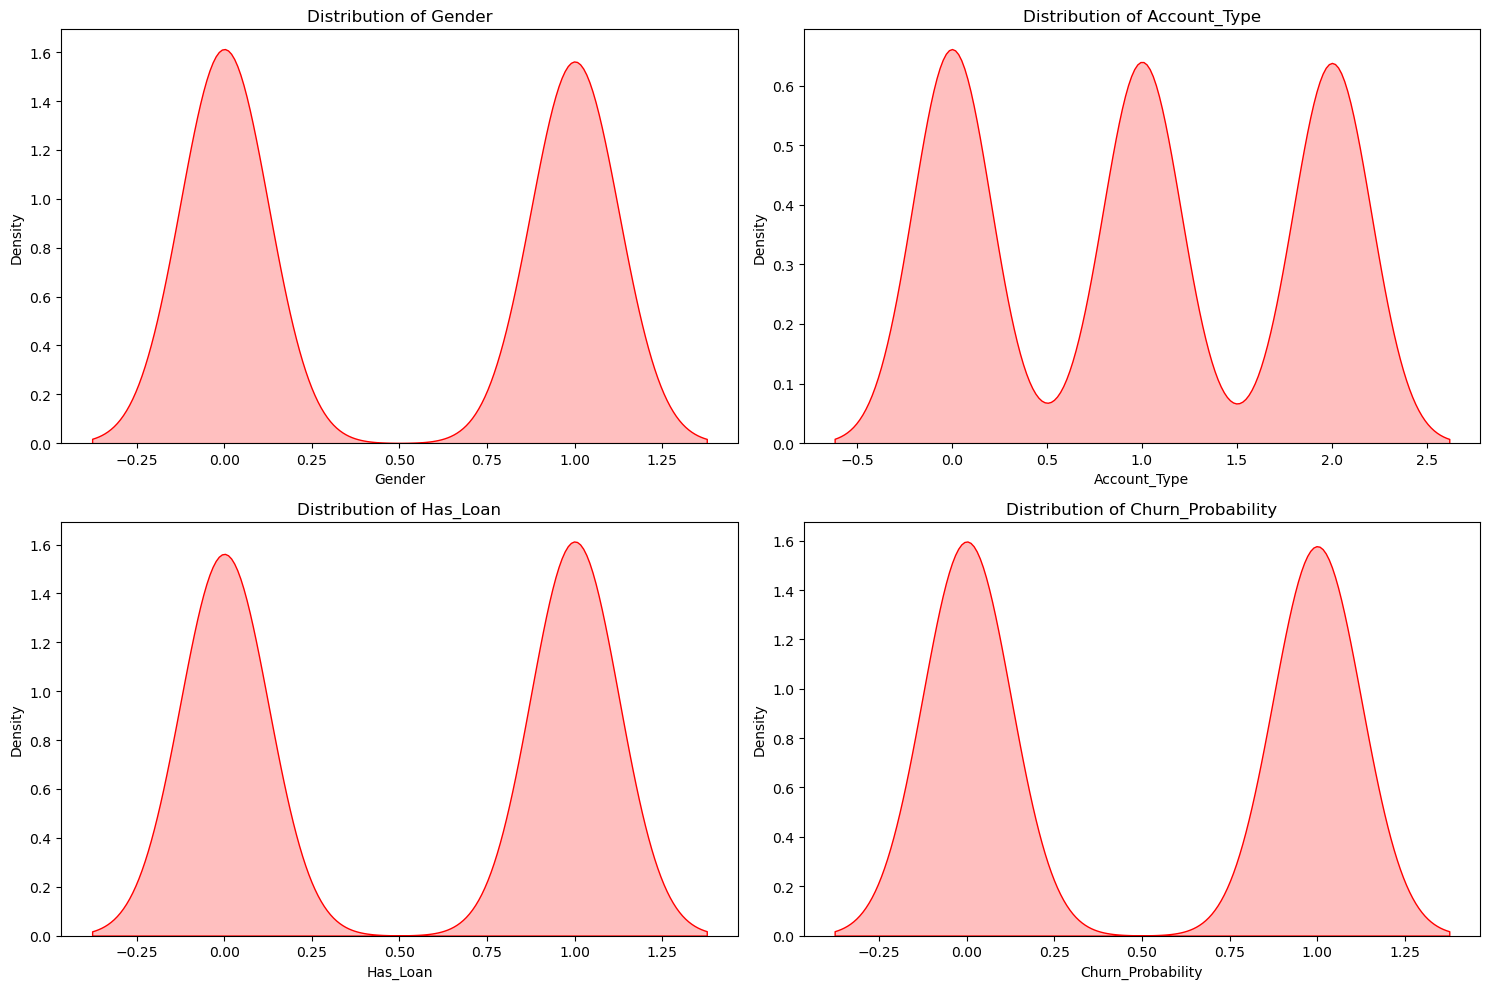

In [24]:
cat_cols = ['Gender','Account_Type','Has_Loan','Churn_Probability']
fig, axes = plt.subplots(2,2, figsize=(15, 10))

axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.kdeplot(df[col],fill=True,color="Red", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

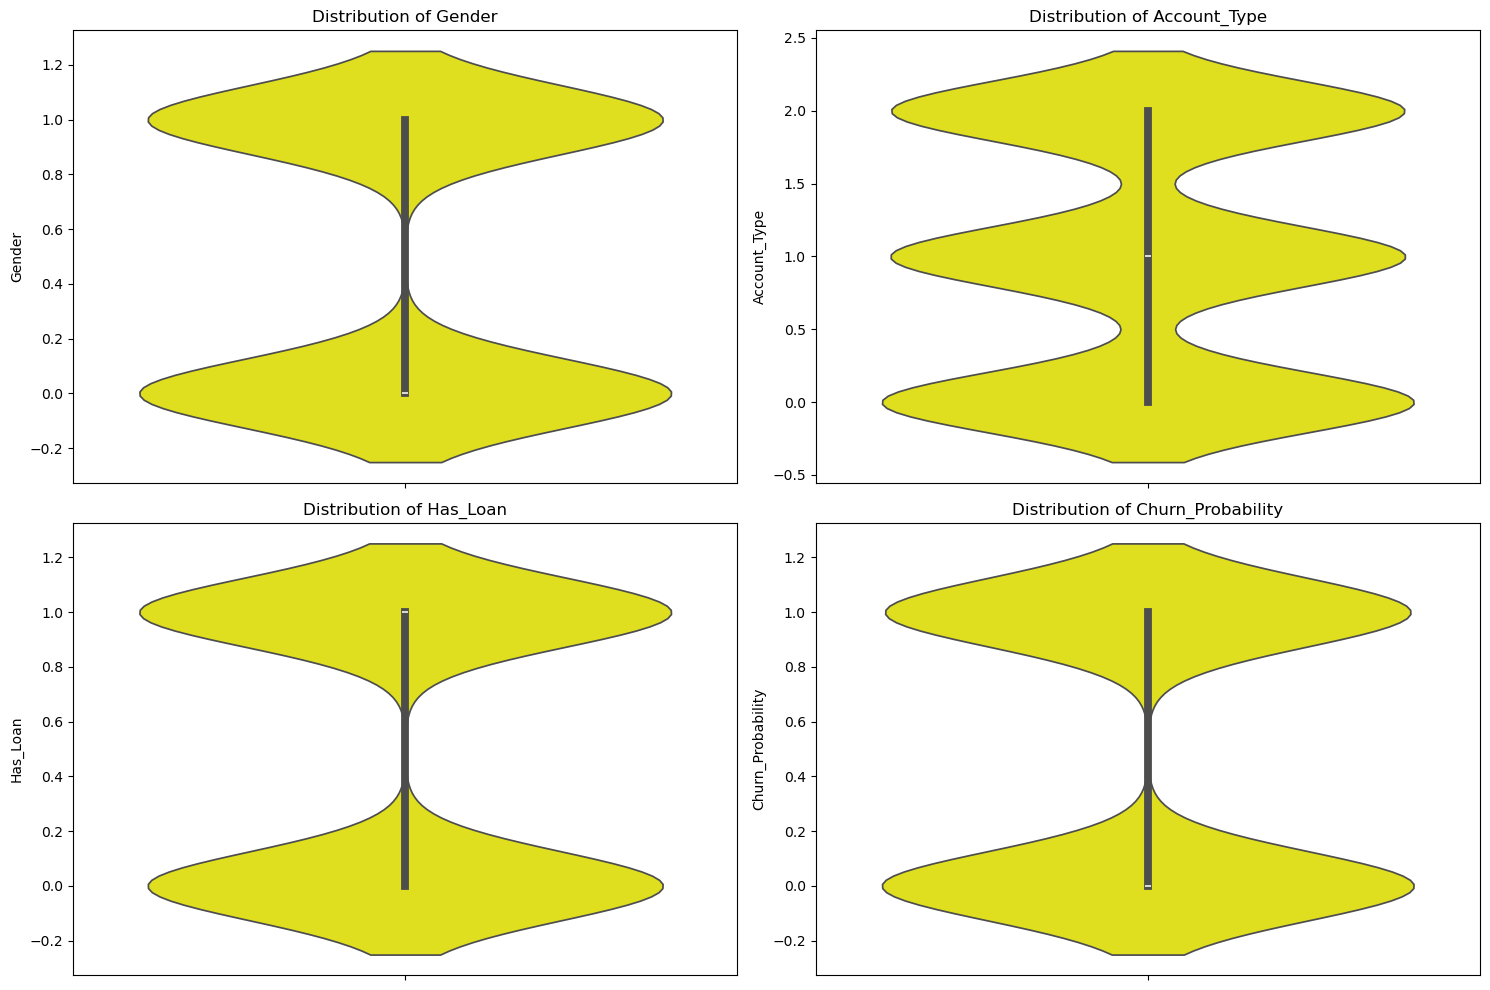

In [25]:
cat_cols = ['Gender','Account_Type','Has_Loan','Churn_Probability']
fig, axes = plt.subplots(2,2, figsize=(15, 10))

axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.violinplot(df[col],color="yellow", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

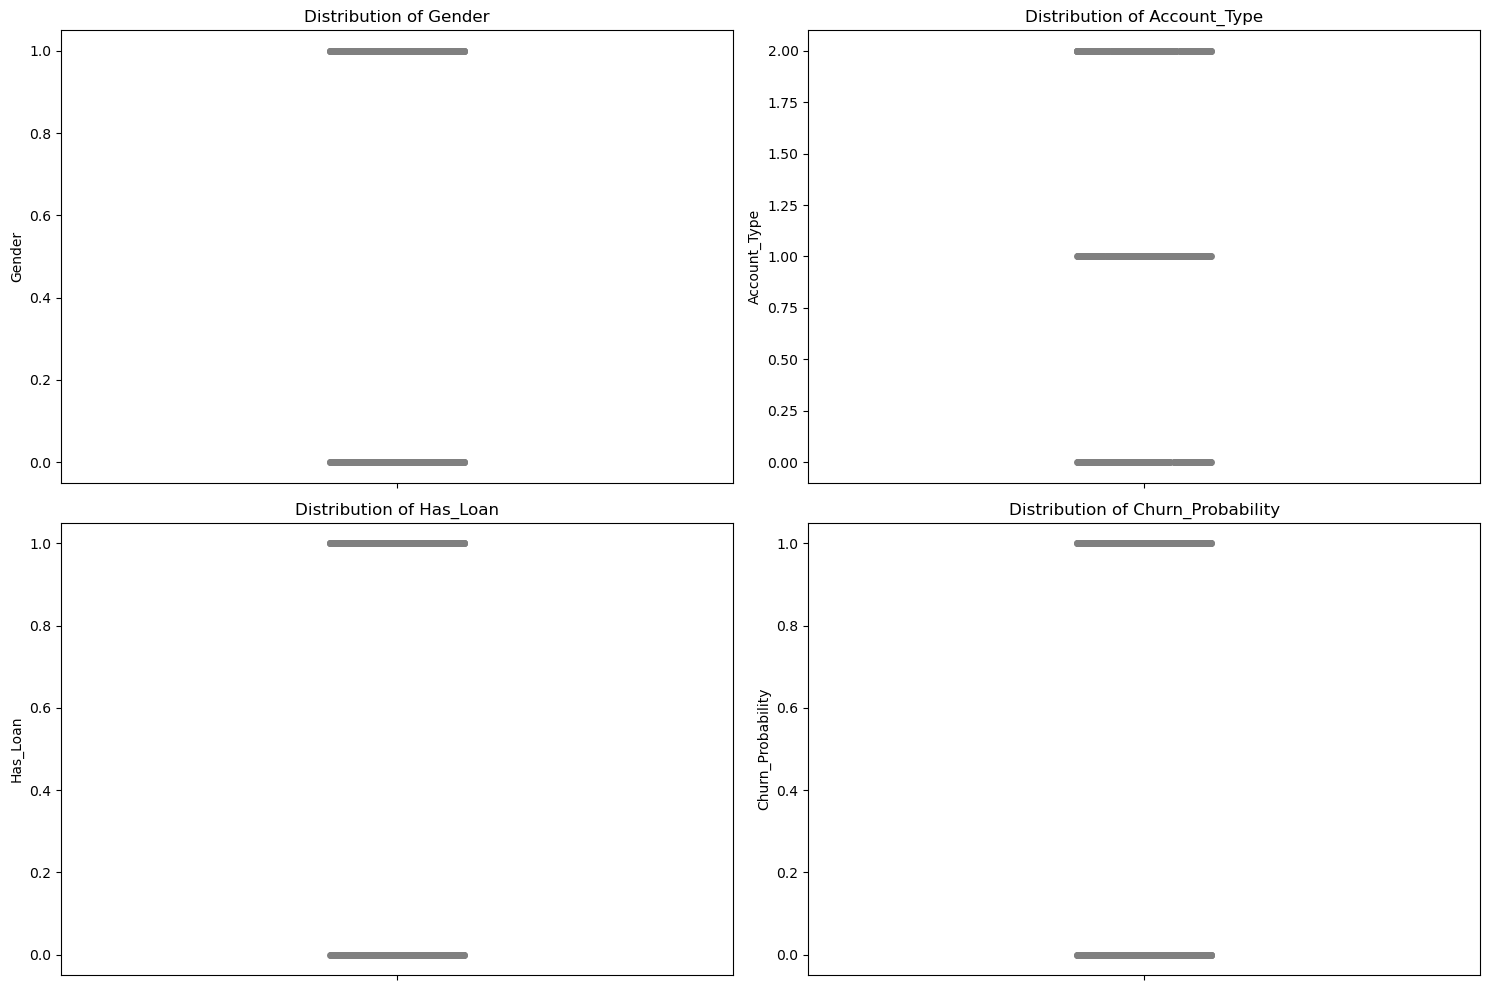

In [26]:
cat_cols = ['Gender','Account_Type','Has_Loan','Churn_Probability']
fig, axes = plt.subplots(2,2, figsize=(15, 10))

axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.stripplot(df[col],color="Grey", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

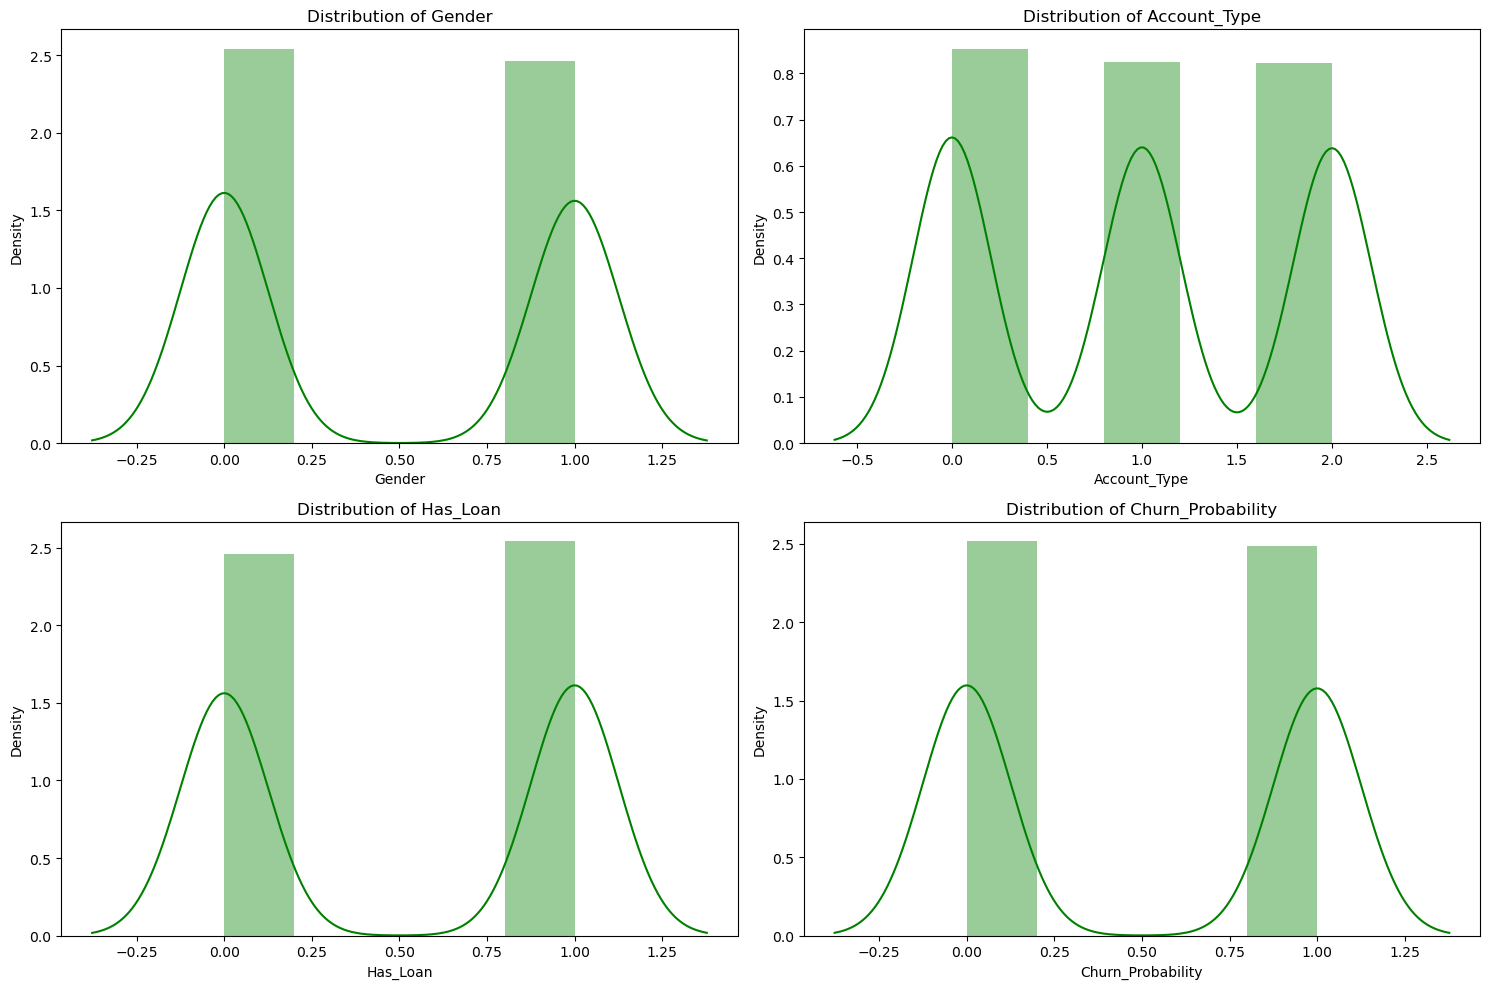

In [27]:
cat_cols = ['Gender','Account_Type','Has_Loan','Churn_Probability']
fig, axes = plt.subplots(2,2, figsize=(15, 10))

axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.distplot(df[col],color="Green",ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

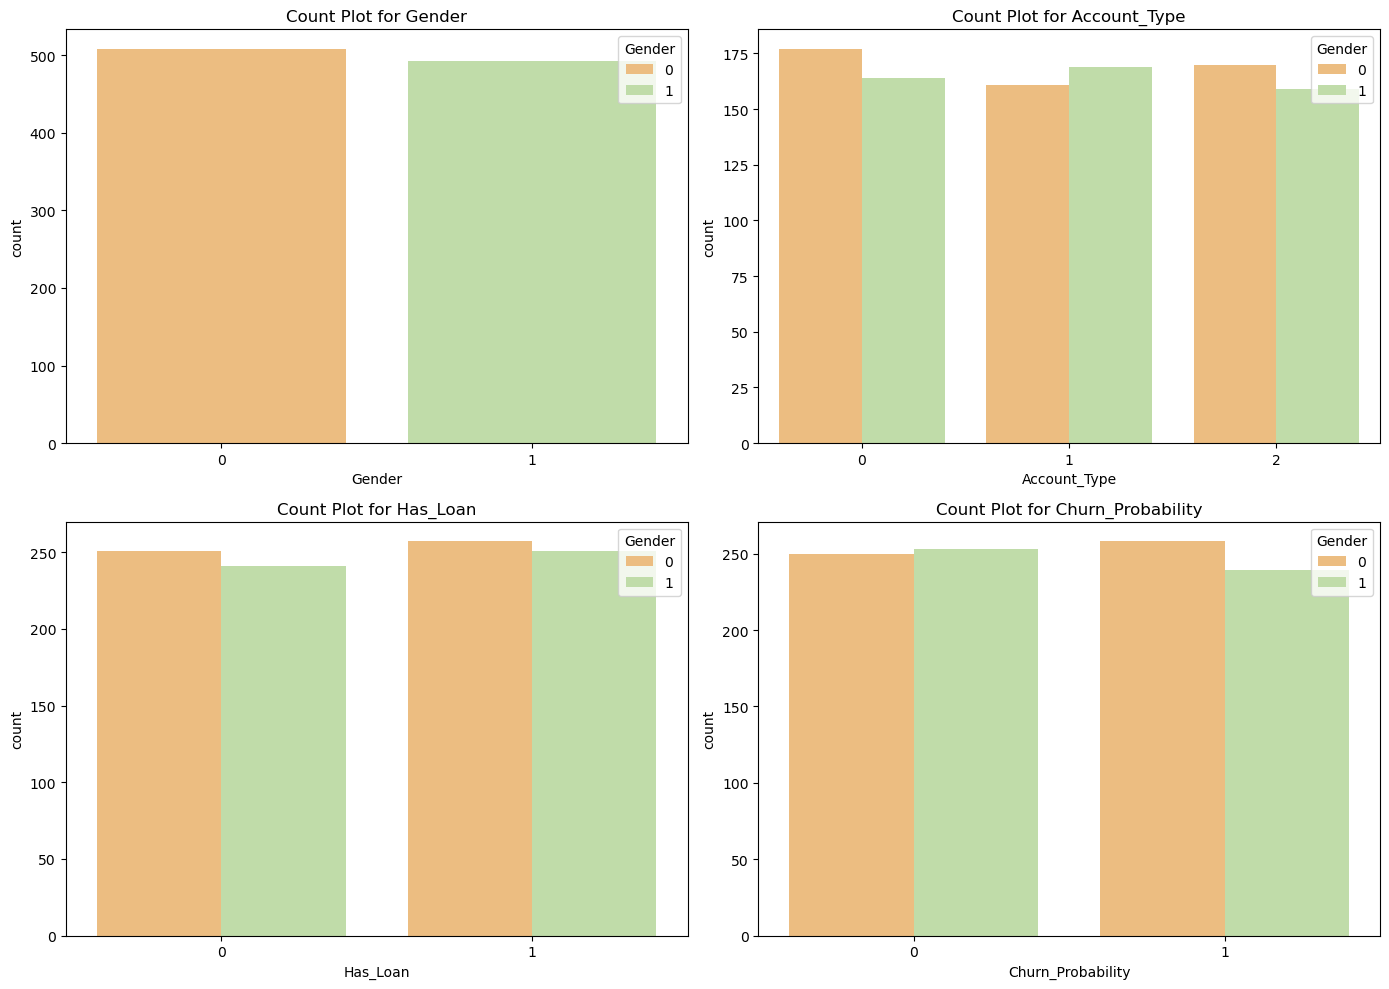

In [28]:
cat_cols = ['Gender','Account_Type','Has_Loan','Churn_Probability']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], hue=df['Gender'], palette="Spectral", ax=axes[i])
    axes[i].set_title(f"Count Plot for {col}")

plt.tight_layout()  
plt.show()

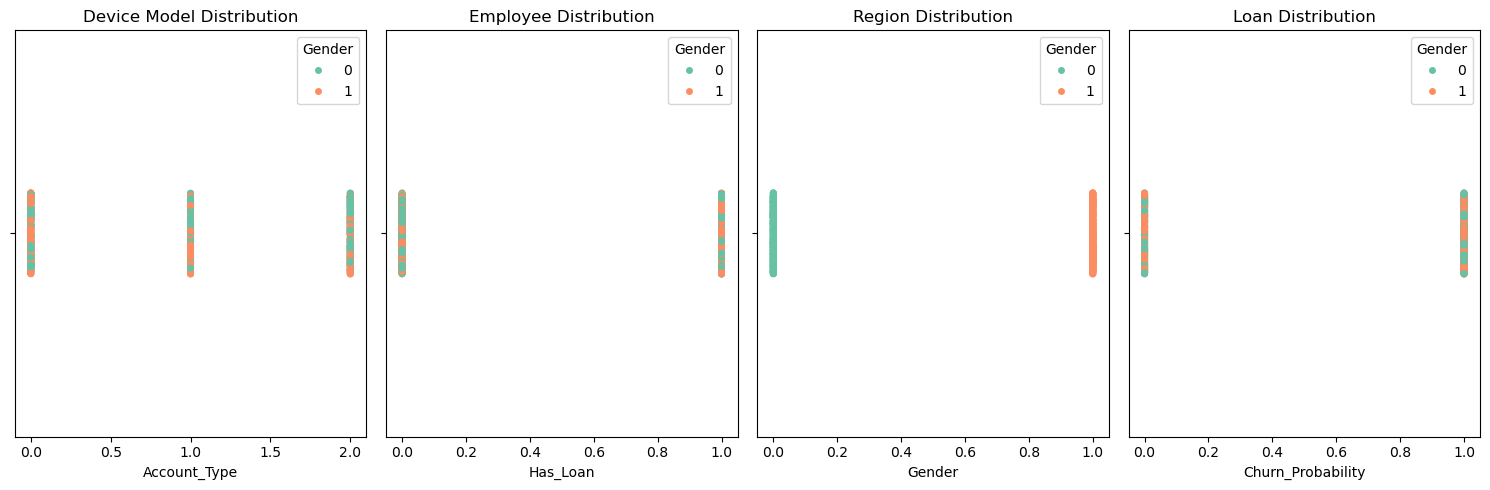

In [29]:
cat_cols = ['Gender','Account_Type','Has_Loan','Churn_Probability']
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.stripplot(x=df['Account_Type'], ax=axes[0],hue=df['Gender'], palette="Set2")
axes[0].set_title("Device Model Distribution")

sns.stripplot(x=df['Has_Loan'], ax=axes[1],hue=df['Gender'], palette="Set2")
axes[1].set_title("Employee Distribution")

sns.stripplot(x=df['Gender'], ax=axes[2],hue=df['Gender'], palette="Set2")
axes[2].set_title("Region Distribution")

sns.stripplot(x=df['Churn_Probability'], ax=axes[3],hue=df['Gender'], palette="Set2")
axes[3].set_title("Loan Distribution")

plt.tight_layout()
plt.show()

#### UNIVARIATE AND MULTIVARIATE ANALYSIS

In [30]:
class Univariate:
    def __init__(self, df):
        self.df = df
    
    def Univariate_plot(self):
        fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 

        sns.swarmplot(self.df["Account_Type"],color="seagreen", ax=axes[0, 0])
        axes[0, 0].set_title("Account_Type Distribution")

        sns.histplot(x=self.df["Has_Loan"], bins=20, kde=True,color="seagreen", ax=axes[0, 1])
        axes[0, 1].set_title("Loan Distribution")

        sns.kdeplot(x=self.df["Gender"],fill=True, color="seagreen", ax=axes[1, 0])
        axes[1, 0].set_title("Gender Distribution")

        sns.stripplot(x=self.df["Churn_Probability"],color="seagreen", ax=axes[1, 1])
        axes[1, 1].set_title("Churn_Probability Distribution")

        plt.tight_layout()
        plt.show()


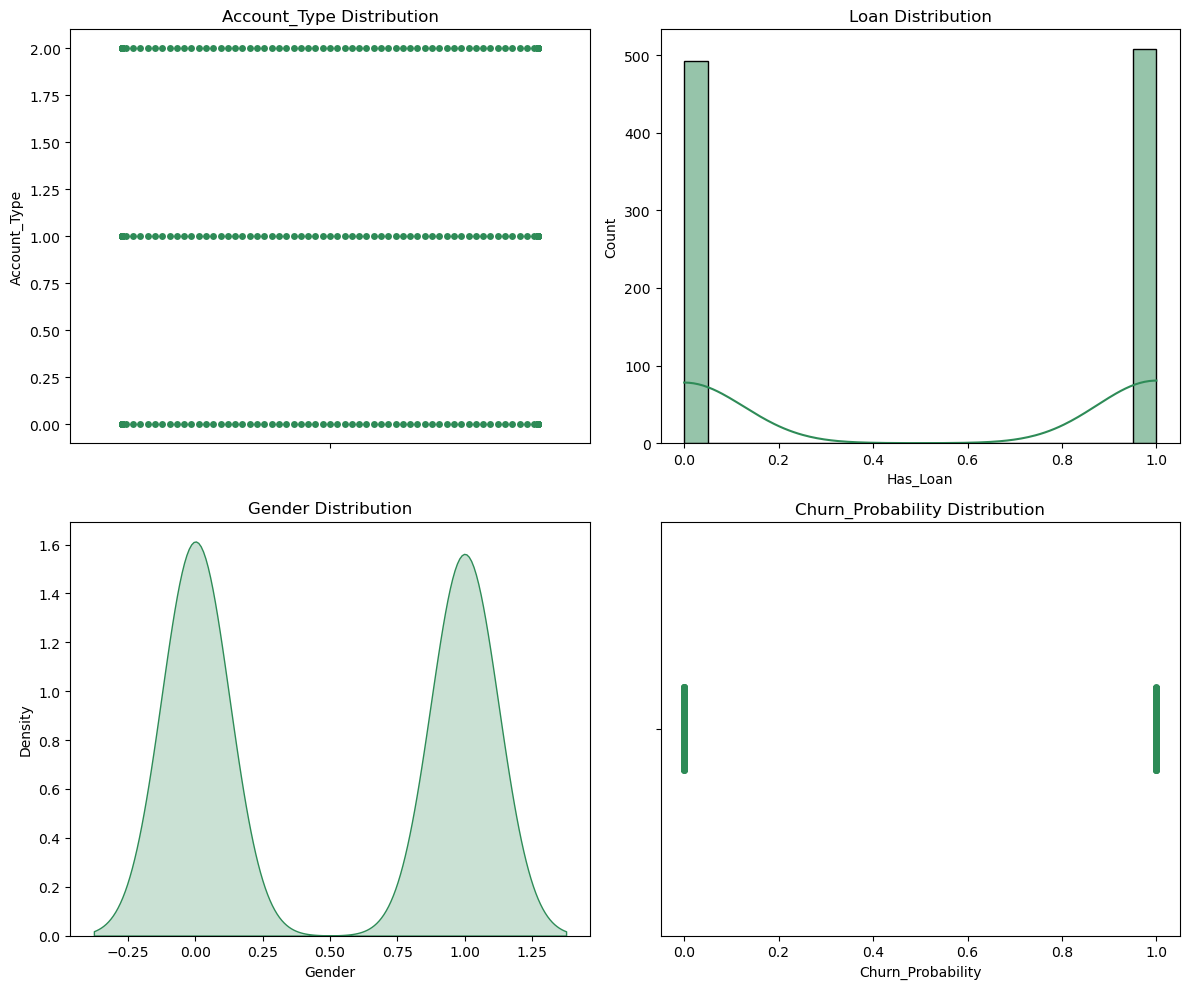

In [31]:
a = Univariate(df)
a.Univariate_plot()

In [32]:
class multivariate:
    def __init__(self, df):
        self.df = df
    
    def multivariate_plot(self):
        fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 

        sns.kdeplot(x=df["Account_Type"], y=df["Account_Tenure"], hue=df["Gender"],palette="Set2", ax=axes[0, 0])
        axes[0, 0].set_title("Account Type wise Account Tenure")

        sns.stripplot(x=df["Gender"], y=df["Balance_Amount"], hue=df["Gender"],palette="Set2", ax=axes[0, 1])
        axes[0, 1].set_title("Genderwise Balance Amount ")

        sns.barplot(x=df["Gender"], y=df["Churn_Probability"], hue=df["Gender"],palette="Set2", ax=axes[1, 0])
        axes[1, 0].set_title("Genderwise Churn Probability")

        sns.stripplot(x=df["Age"], y=df["Has_Loan"], hue=df["Gender"],palette="Set2", ax=axes[1, 1])
        axes[1, 1].set_title("Agewise Loan Holders")

        plt.tight_layout()
        plt.show()


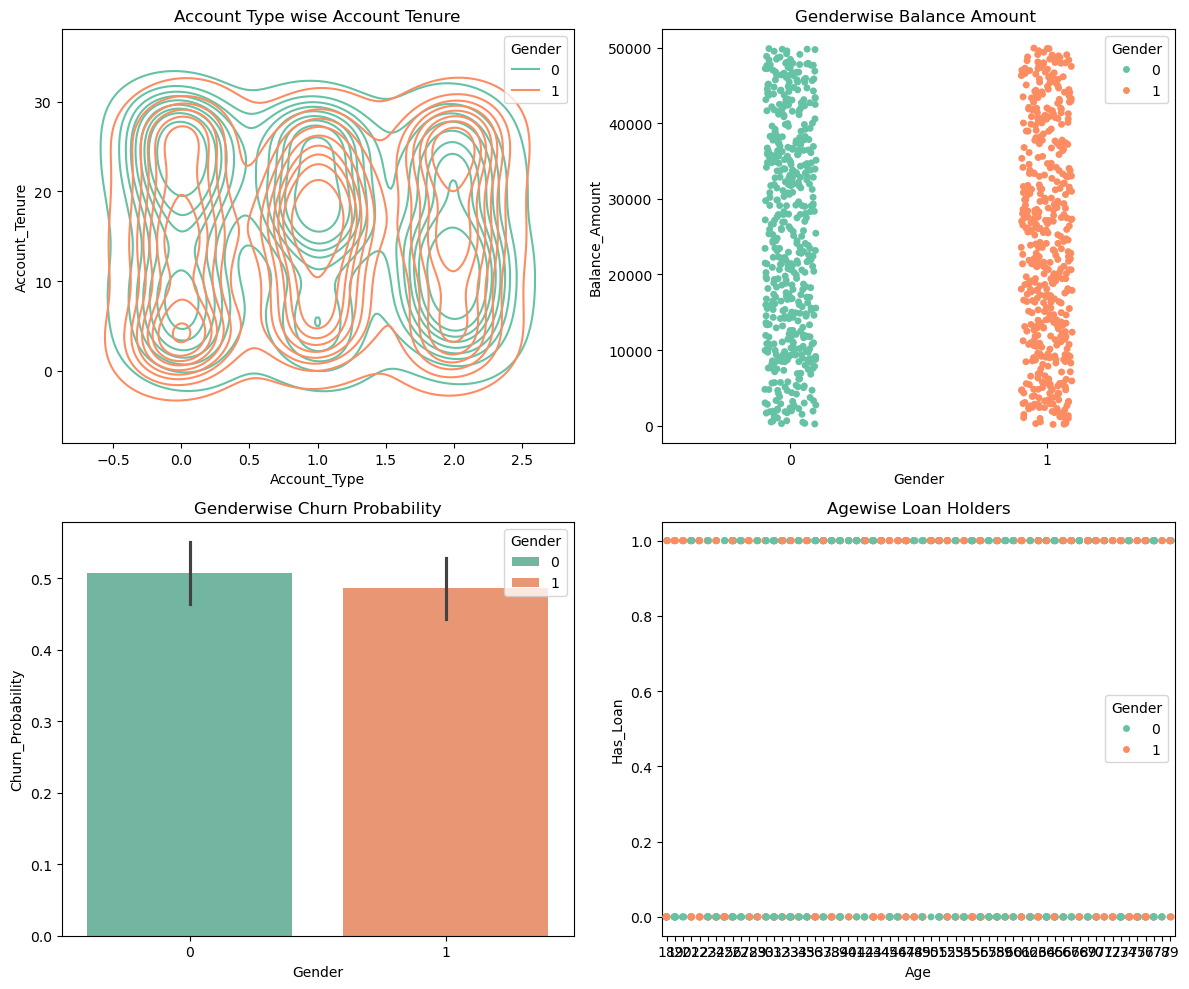

In [33]:
m = multivariate(df)
m.multivariate_plot()

#### CORRELATION HEATMAP

In [34]:
correlation_matrix = df.corr()

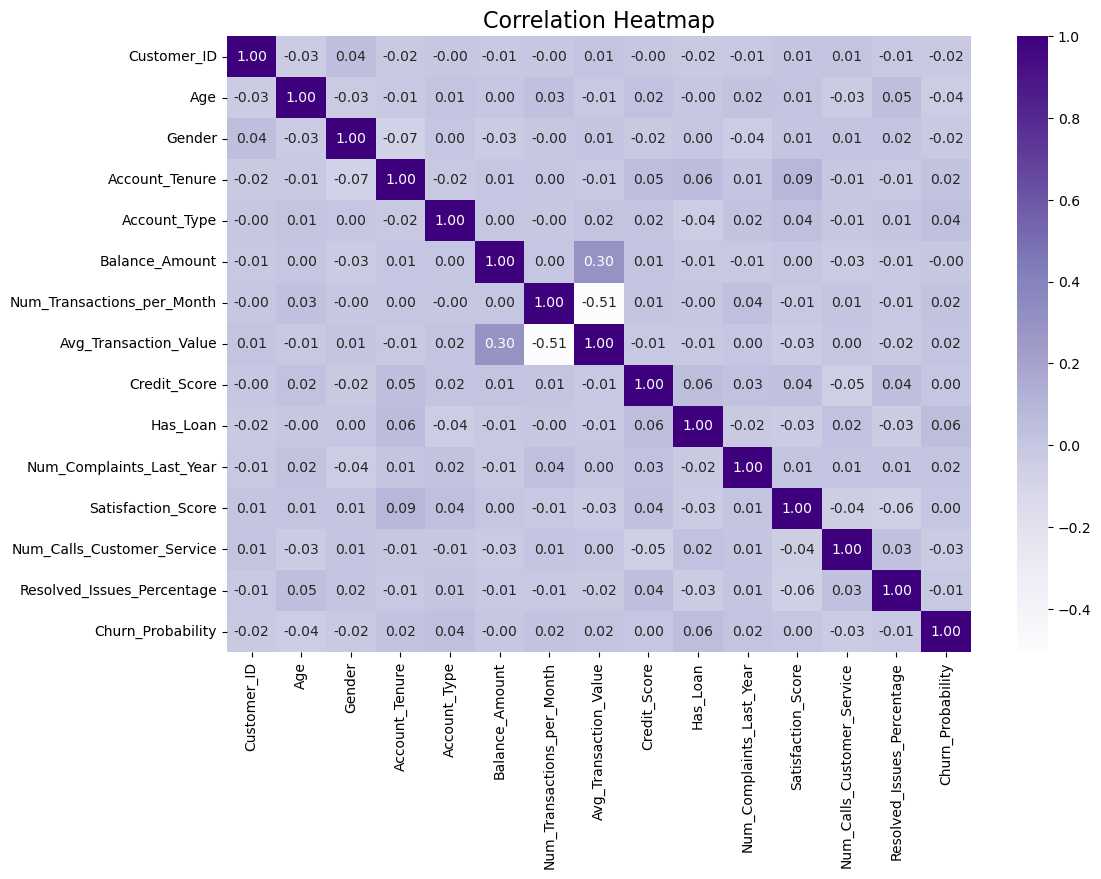

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Purples', cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

#### PAIRPLOT

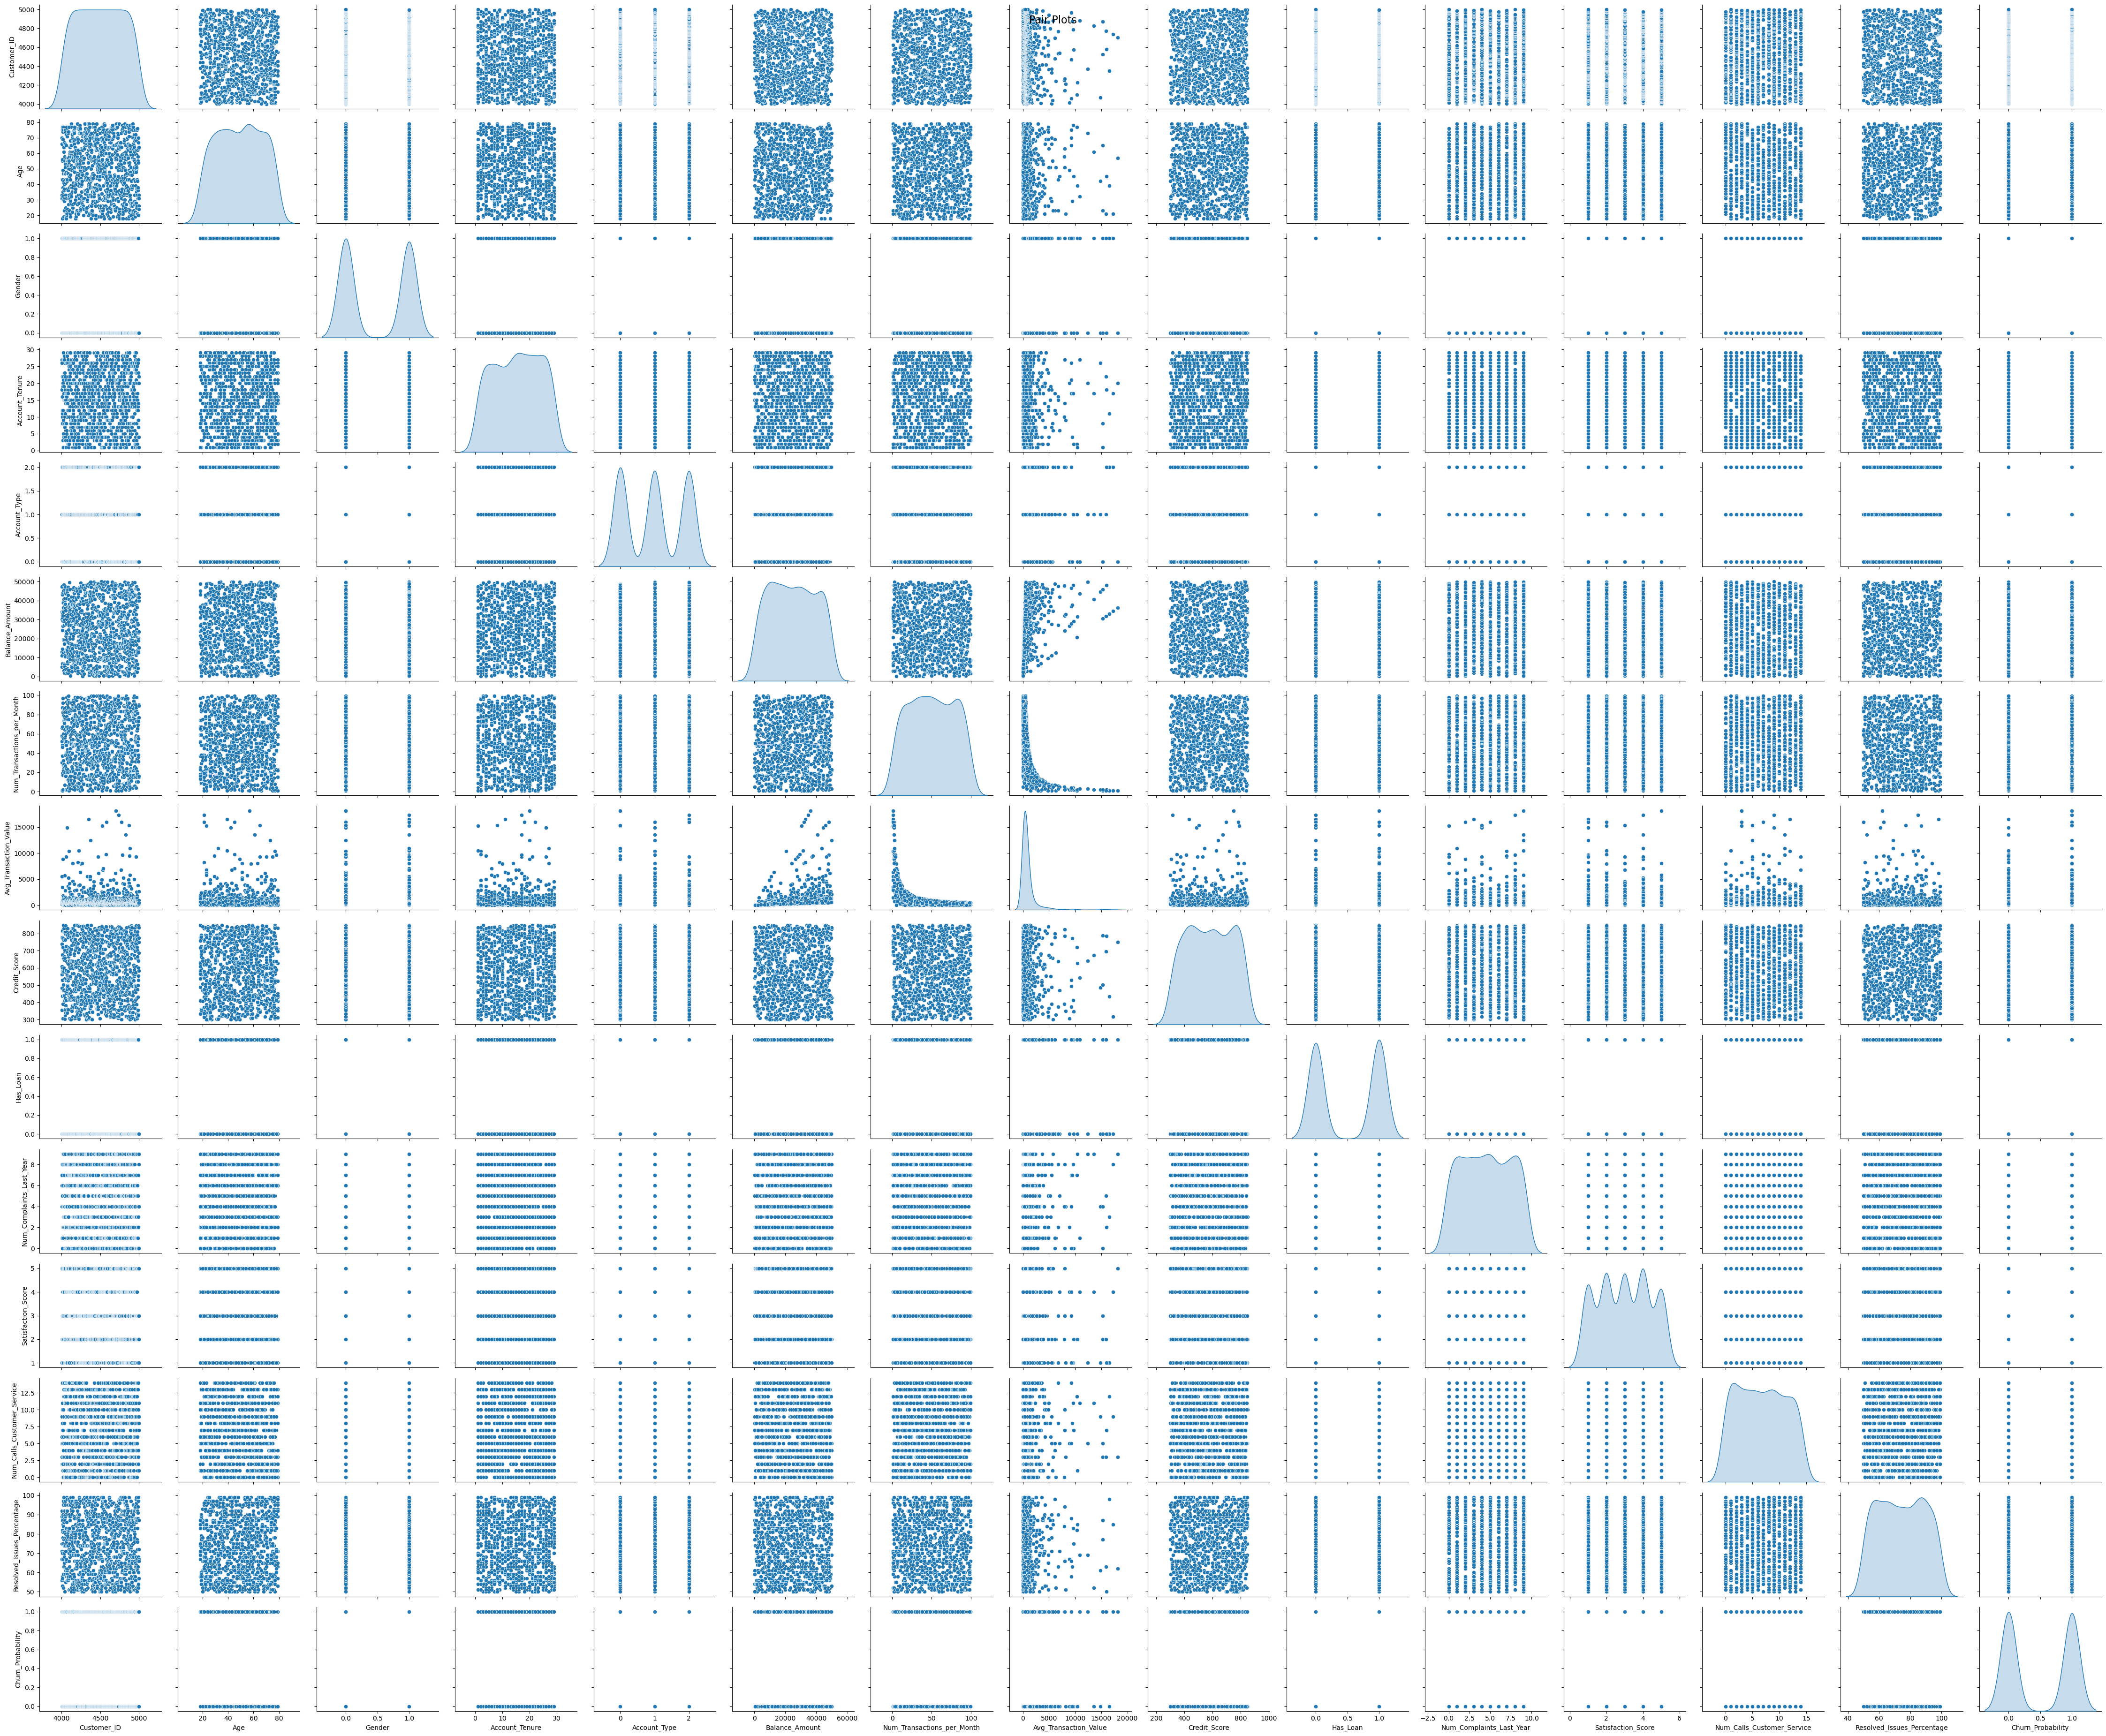

In [36]:
sns.pairplot(df, diag_kind="kde",aspect=1.2)
plt.suptitle("Pair Plots", fontsize=16)
plt.tight_layout()
plt.show()

#### OUTLIERS CHECKING

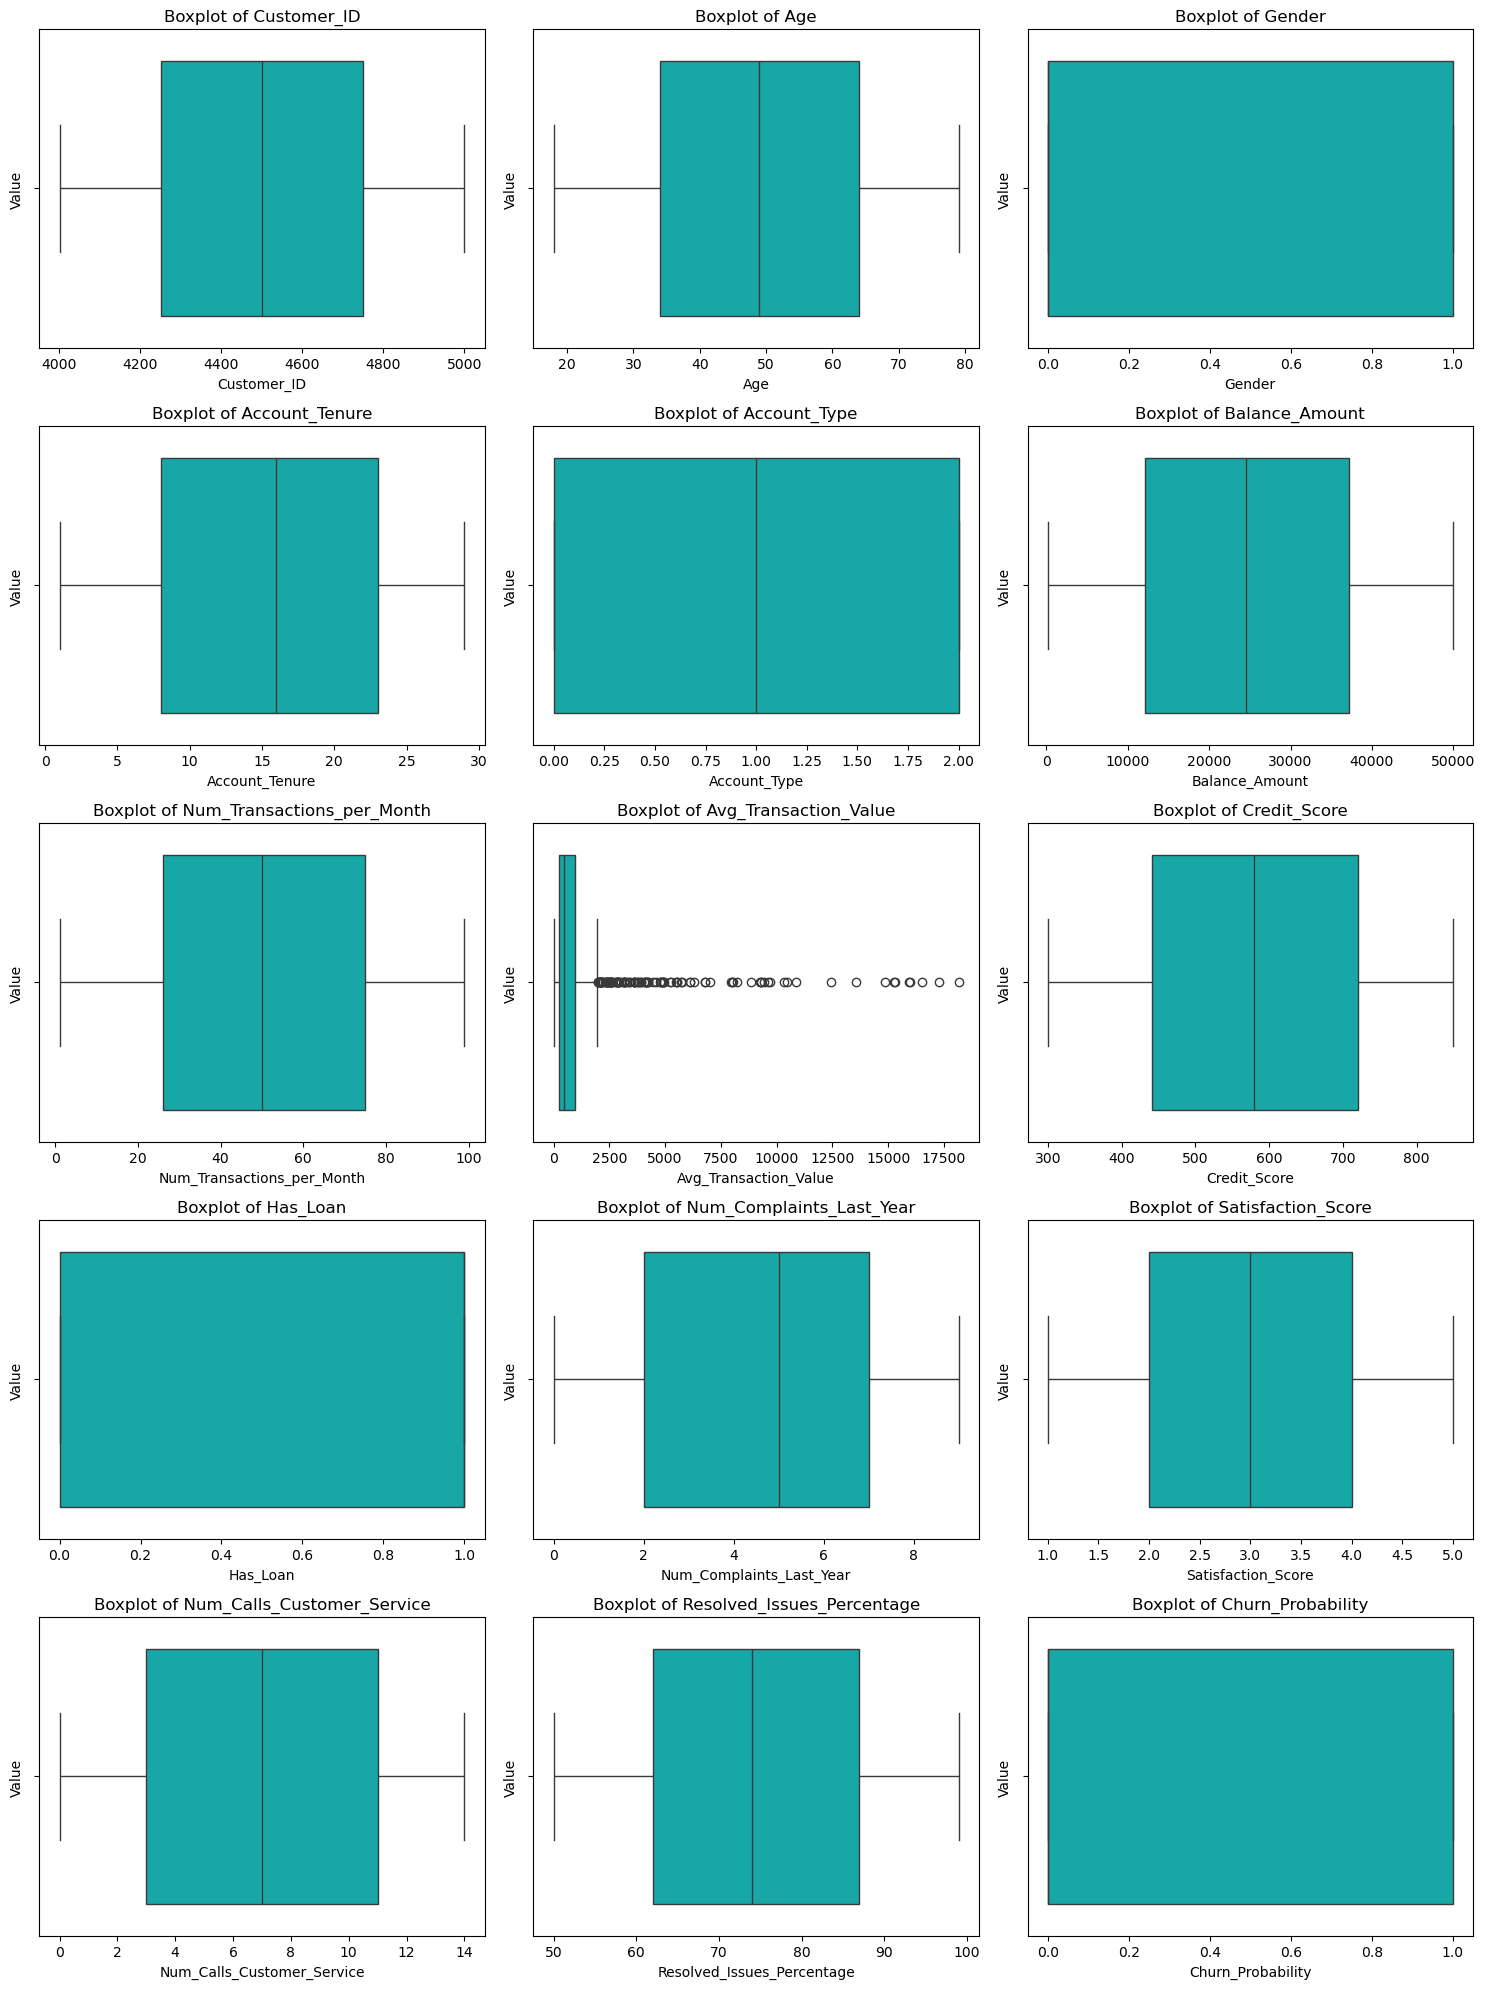

In [37]:
cols = df.columns

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], color="c", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

In [38]:
def Handling_Outliers(col):
    print(f"{col} : Outliers Checking")
    sns.boxplot(df[col], color = "m")
    plt.show()
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)
    q3 = df[col].quantile(0.75)
 
    iqr = q3 - q1
    print(f"IQR={iqr}")
    LowerTail = q1 - 1.5 * iqr
    UpperTail = q3 + 1.5 * iqr
    print(f"Lower Tail = {LowerTail}")
    print(f"Upper Tail = {UpperTail}")
    print("-"*80)
 
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print(f"\nOutliers of {col} :\n{Outliers}")
 
    df.loc[(df[col] < LowerTail), col] = LowerTail
    df.loc[(df[col] > UpperTail), col] = UpperTail

Avg_Transaction_Value : Outliers Checking


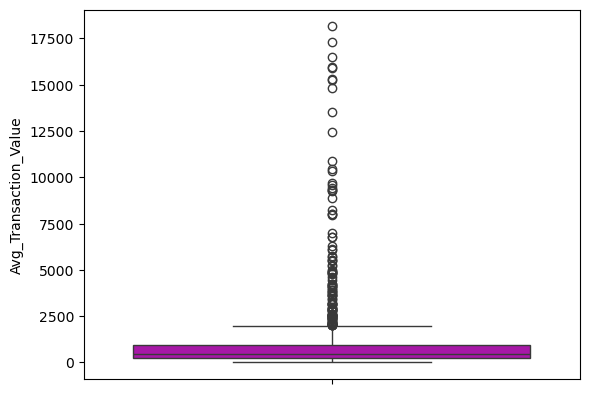

IQR=687.5
Lower Tail = -781.25
Upper Tail = 1968.75
--------------------------------------------------------------------------------

Outliers of Avg_Transaction_Value :
     Customer_ID  Age  Gender  Account_Tenure  Account_Type  Balance_Amount  \
1           4002   66       0              18             1           10964   
9           4010   56       0              22             2            6809   
13          4014   49       1              20             0           26597   
39          4040   55       0               8             0           45762   
46          4047   53       0              11             2           47401   
..           ...  ...     ...             ...           ...             ...   
938         4939   51       0              18             1           34764   
963         4964   70       1              26             2           46506   
964         4965   25       1              20             1           27632   
984         4985   55       0           

In [39]:
Handling_Outliers('Avg_Transaction_Value')

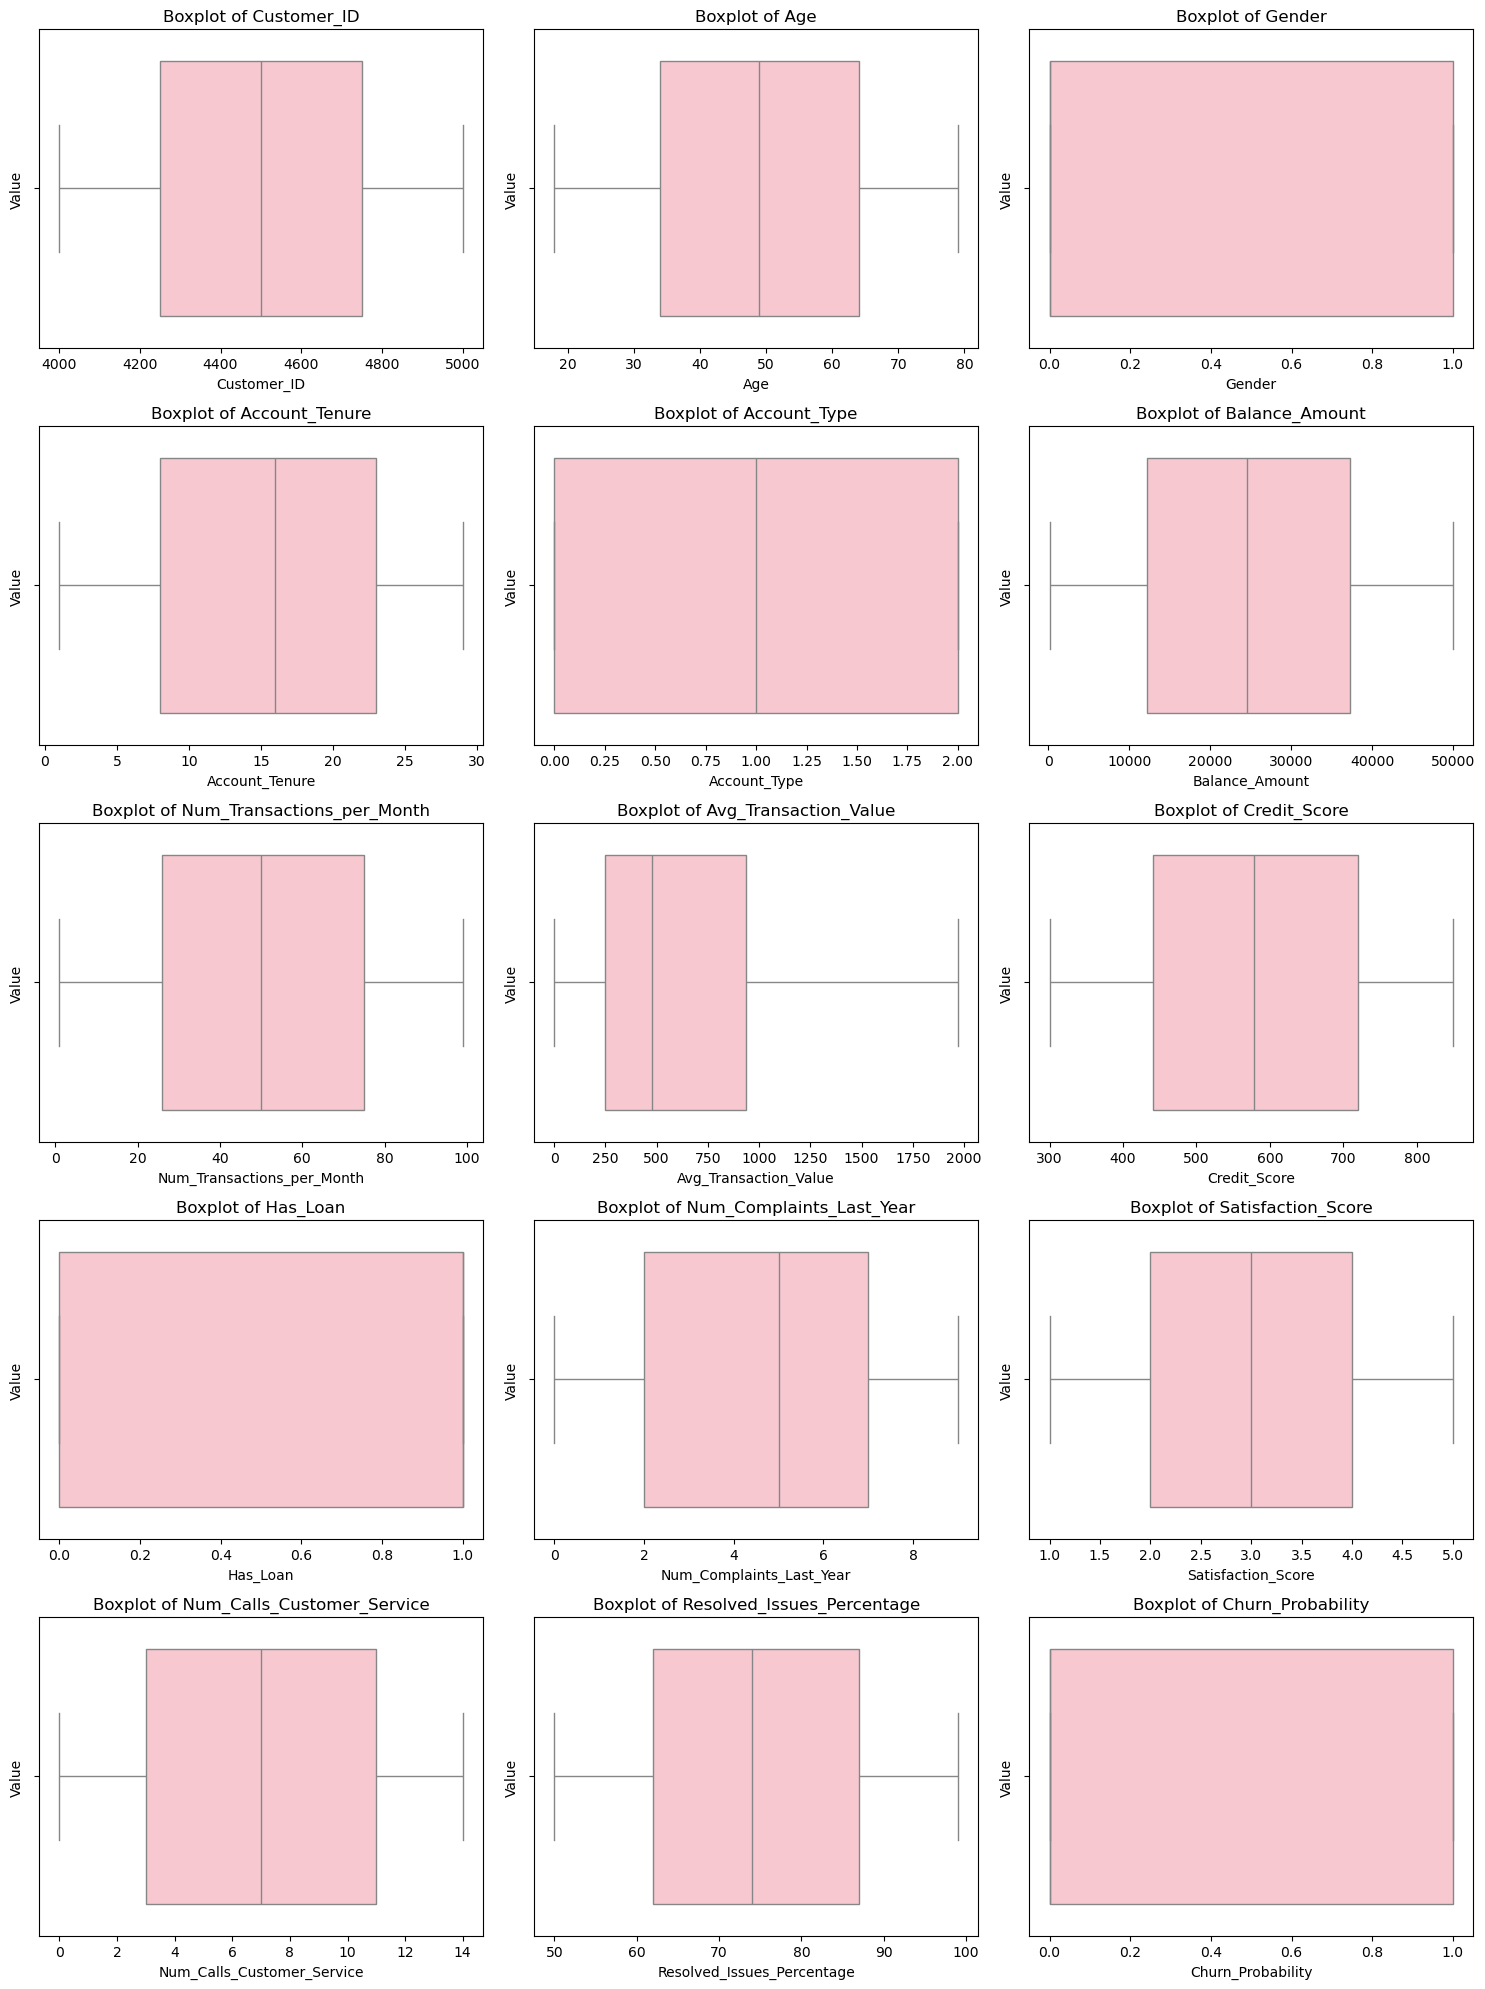

In [40]:
cols = df.columns

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], color="pink", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

#### MORE VISUAL COMPARISIONS

##### What is the distribution of customer churn based on demographic factors such as age and gender?

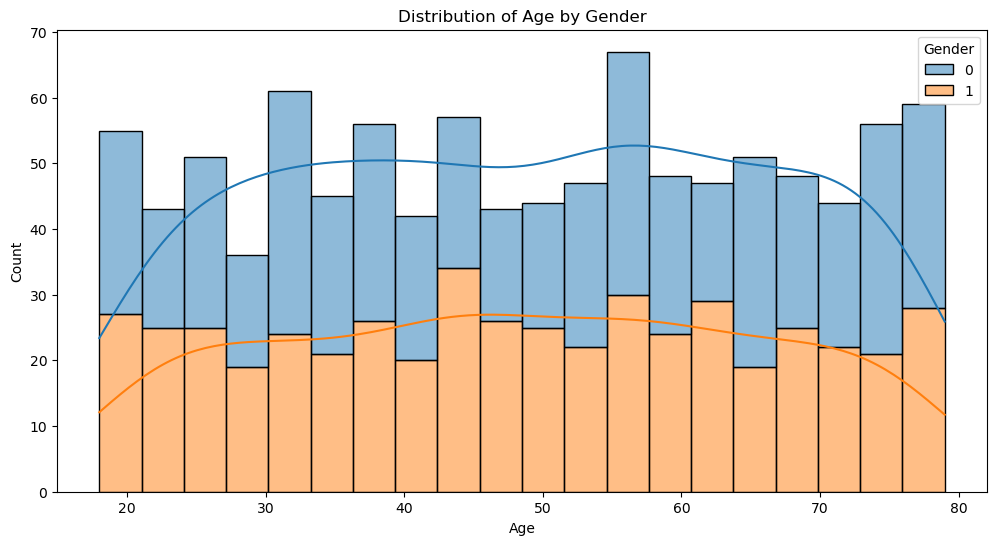

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Age", hue="Gender", multiple="stack", bins=20, kde=True)
plt.title("Distribution of Age by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

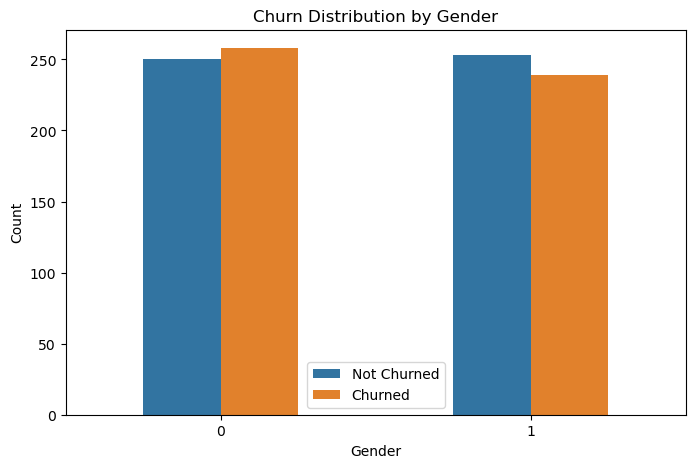

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="Churn_Probability",width=0.5)
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Not Churned", "Churned"])
plt.show()


##### How does account tenure impact churn probability?

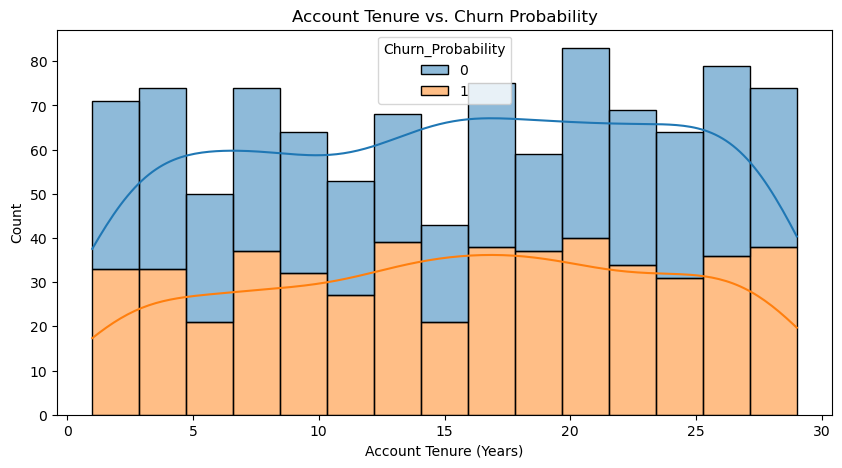

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Account_Tenure", hue="Churn_Probability", multiple="stack", bins=15, kde=True)
plt.title("Account Tenure vs. Churn Probability")
plt.xlabel("Account Tenure (Years)")
plt.ylabel("Count")
plt.show()

##### What is the relationship between credit score and churn likelihood?

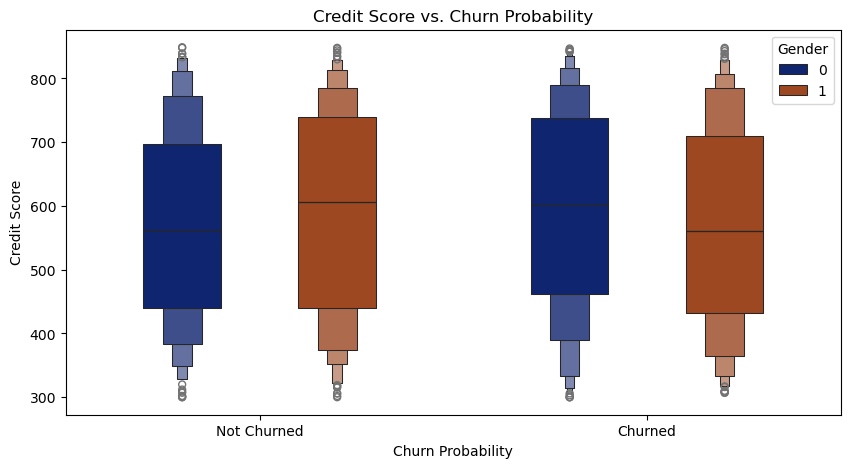

In [44]:
plt.figure(figsize=(10, 5))
sns.boxenplot(data=df, x="Churn_Probability", y="Credit_Score",hue=df["Gender"],palette="dark",gap=0.5)
plt.title("Credit Score vs. Churn Probability")
plt.xlabel("Churn Probability")
plt.ylabel("Credit Score")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.show()

##### How does customer satisfaction score correlate with churn probability?

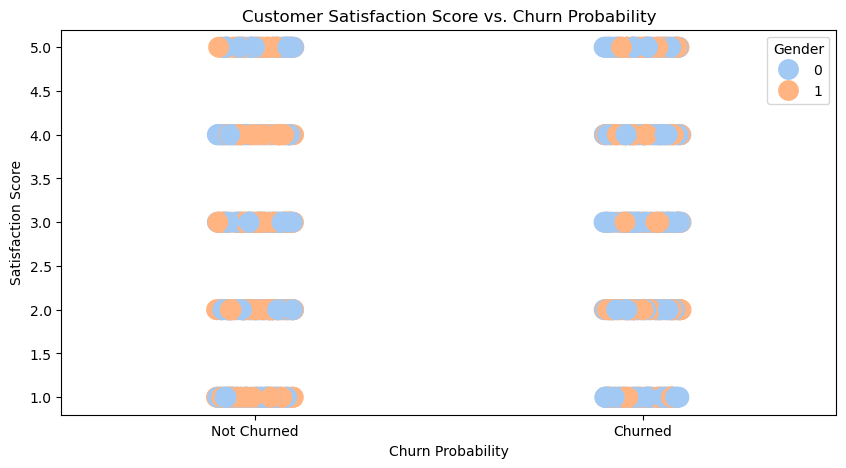

In [45]:
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x="Churn_Probability", y="Satisfaction_Score",hue=df["Gender"],palette="pastel",size=15)
plt.title("Customer Satisfaction Score vs. Churn Probability")
plt.xlabel("Churn Probability")
plt.ylabel("Satisfaction Score")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.show()


##### Do high complaint rates and unresolved issues contribute to increased churn?

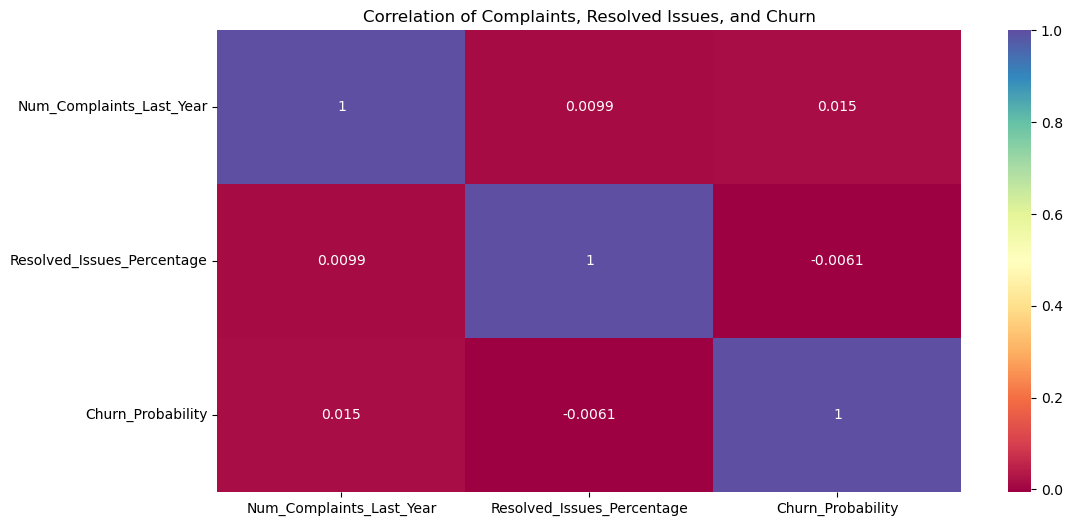

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[["Num_Complaints_Last_Year", "Resolved_Issues_Percentage", "Churn_Probability"]].corr(), annot=True, cmap="Spectral")
plt.title("Correlation of Complaints, Resolved Issues, and Churn")
plt.show()

#### Hypothesis Testing

In [47]:
churned = df[df["Churn_Probability"] == 1]
not_churned = df[df["Churn_Probability"] == 0]

##### 1. Age and Churn (t-test)

In [48]:
t_stat, p_value = stats.ttest_ind(churned["Age"], not_churned["Age"], equal_var=False)
print("Age and Churn - t-test:", "p-value:", p_value)

Age and Churn - t-test: p-value: 0.2330403920906882


##### 2. Satisfaction Score and Churn (t-test)

In [49]:
t_stat, p_value = stats.ttest_ind(churned["Satisfaction_Score"], not_churned["Satisfaction_Score"], equal_var=False)
print("Satisfaction Score and Churn - t-test:", "p-value:", p_value)

Satisfaction Score and Churn - t-test: p-value: 0.891118159972328


##### 3. Account Tenure and Churn (t-test)

In [50]:
t_stat, p_value = stats.ttest_ind(churned["Account_Tenure"], not_churned["Account_Tenure"], equal_var=False)
print("Account Tenure and Churn - t-test:", "p-value:", p_value)

Account Tenure and Churn - t-test: p-value: 0.5343503757518522


#### ASSUMPTION 1 : NO MULTICOLINEARITY

In [61]:
vif_df = pd.DataFrame()
vif_df["Independent Features"] = x.columns
vif_df

Independent Features
0                          Age
1                       Gender
2               Account_Tenure
3                 Account_Type
4               Balance_Amount
5   Num_Transactions_per_Month
6        Avg_Transaction_Value
7                 Credit_Score
8                     Has_Loan
9     Num_Complaints_Last_Year
10          Satisfaction_Score
11  Num_Calls_Customer_Service
12  Resolved_Issues_Percentage

In [62]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)

vif_df["VIF"] = vif_list

In [63]:
vif_df

Independent Features        VIF
0                          Age  59.375716
1                       Gender   8.639092
2               Account_Tenure   1.989164
3                 Account_Type   4.346979
4               Balance_Amount   2.466531
5   Num_Transactions_per_Month   9.305222
6        Avg_Transaction_Value  13.472297
7                 Credit_Score  10.711303
8                     Has_Loan  14.136675
9     Num_Complaints_Last_Year   2.059205
10          Satisfaction_Score   3.441624
11  Num_Calls_Customer_Service   5.815139
12  Resolved_Issues_Percentage   3.382764

#### TRAIN TEST SPLIT 

In [64]:
x = df.drop(columns=["Churn_Probability", "Customer_ID"])
y = df["Churn_Probability"]

In [65]:
x.head()

Age  Gender  Account_Tenure  Account_Type  Balance_Amount  \
0   70       0              27             1           47297   
1   66       0              18             1           10964   
2   31       1              27             0           12911   
3   31       1              27             2            5134   
4   33       0              16             0           30317   

   Num_Transactions_per_Month  Avg_Transaction_Value  Credit_Score  Has_Loan  \
0                          66                 705.00           777         0   
1                           1                1968.75           739         0   
2                          57                 222.00           562         1   
3                          30                 165.00           484         0   
4                          58                 513.00           354         1   

   Num_Complaints_Last_Year  Satisfaction_Score  Num_Calls_Customer_Service  \
0                         1                   5                           2   
1                         8                   2                           9   
2                         6                   5                           5   
3                         4                   2                           3   
4                         6                   2                           6   

   Resolved_Issues_Percentage  
0                          89  
1                          71  
2                          56  
3                          67  
4                          75

In [66]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Churn_Probability, dtype: int32

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [68]:
xtrain.shape

(800, 13)

In [69]:
ytrain.shape

(800,)

In [70]:
xtest.shape

(200, 13)

In [71]:
ytest.shape

(200,)

In [72]:
scaler = StandardScaler()
std = scaler.fit_transform(x)
std

array([[ 1.20244419, -0.98412598,  1.38276451, ...,  1.4667626 ,
        -1.08444504,  1.00240351],
       [ 0.97409225, -0.98412598,  0.31636515, ..., -0.72243531,
         0.51604311, -0.23081795],
       [-1.02398715,  1.01613007,  1.38276451, ...,  1.4667626 ,
        -0.39852155, -1.2585025 ],
       ...,
       [-1.30942707, -0.98412598, -1.34247831, ..., -0.72243531,
        -1.31308621, -0.57337947],
       [ 0.85991629, -0.98412598, -1.69794477, ..., -1.45216794,
         0.97332544,  0.8653789 ],
       [-1.42360303, -0.98412598,  0.79032042, ..., -0.72243531,
         0.28740194, -0.16230565]])

### ALGORITHM 1 : LOGISTIC REGRESSION

#### MODEL TRAINING

In [73]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [74]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

In [75]:
xtrain.head(5)

Age  Gender  Account_Tenure  Account_Type  Balance_Amount  \
504   50       0              25             0            8935   
839   33       1              26             1            8119   
141   25       1              17             1           10599   
825   23       0              17             1           42314   
470   75       1              17             2           36996   

     Num_Transactions_per_Month  Avg_Transaction_Value  Credit_Score  \
504                          43                 203.00           633   
839                          30                 261.00           410   
141                           8                1177.00           598   
825                          63                 661.00           443   
470                           3                1968.75           375   

     Has_Loan  Num_Complaints_Last_Year  Satisfaction_Score  \
504         1                         0                   2   
839         0                         7                   2   
141         0                         7                   4   
825         0                         2                   5   
470         1                         7                   3   

     Num_Calls_Customer_Service  Resolved_Issues_Percentage  
504                           0                          84  
839                           4                          86  
141                           4                          99  
825                           8                          83  
470                          14                          58

In [76]:
ytrain.head(5)

504    0
839    1
141    1
825    0
470    1
Name: Churn_Probability, dtype: int32

In [77]:
ytrain_pred = log_reg_model.predict(xtrain)
ytrain_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,

#### MODEL EVALUATION

In [78]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.50375
------------------------------------------------------------
Confusion Matrix : 
 [[183 213]
 [184 220]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[220 184]
  [213 183]]

 [[183 213]
  [184 220]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.46      0.48       396
           1       0.51      0.54      0.53       404

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

------------------------------------------------------------


In [79]:
ytest_pred = log_reg_model.predict(xtest)

In [80]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.45
------------------------------------------------------------
Confusion Matrix : 
 [[45 62]
 [48 45]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[45 48]
  [62 45]]

 [[45 62]
  [48 45]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.48      0.42      0.45       107
           1       0.42      0.48      0.45        93

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200

------------------------------------------------------------


### ALGORITHM 2 : DECISION TREE

#### MODEL TRAINING 

In [81]:
dt_clf = DecisionTreeClassifier()
dt_clf_model = dt_clf.fit(xtrain,ytrain)
dt_clf_model

DecisionTreeClassifier()

In [82]:
ytrain_pred = dt_clf_model.predict(xtrain)
ytest_pred = dt_clf_model.predict(xtest)

#### MODEL EVALUATION

In [83]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


model evaluation for training data
------------------------------------------------------------
Accuracy Score :  1.0
------------------------------------------------------------
Confusion Matrix : 
 [[396   0]
 [  0 404]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[404   0]
  [  0 396]]

 [[396   0]
  [  0 404]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       404

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

------------------------------------------------------------


In [84]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.48
------------------------------------------------------------
Confusion Matrix : 
 [[54 53]
 [51 42]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[42 51]
  [53 54]]

 [[54 53]
  [51 42]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.51      0.50      0.51       107
           1       0.44      0.45      0.45        93

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

------------------------------------------------------------


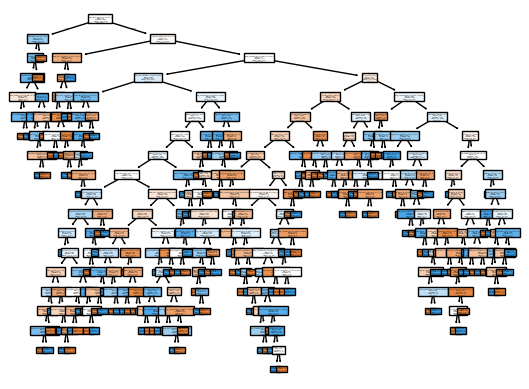

In [85]:
plot_tree(dt_clf_model, feature_names =  df.columns, class_names=["Yes","No"], filled=True)
plt.show()

### ALGORITHM 3 : DECISION TREE WITH HYPERPARAMETER TUNNING

#### MODEL TRAINING

In [86]:
hyperparameters = {"criterion" : ["gini", "entropy", "log_loss"],
                   "max_depth" : np.arange(5,20),
                   "min_samples_split" : np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)}
hyperparameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}

In [87]:
rscv = RandomizedSearchCV(dt_clf_model, hyperparameters, cv = 5)
rscv = rscv.fit(xtrain, ytrain)
rscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=4)

In [88]:
dt_clf = DecisionTreeClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=5,
                       min_samples_split=9)

dt_clf_rscv_model = dt_clf.fit(xtrain, ytrain)
dt_clf_rscv_model

DecisionTreeClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=5,
                       min_samples_split=9)

In [89]:
ytrain_pred = dt_clf_rscv_model.predict(xtrain)
ytest_pred = dt_clf_rscv_model.predict(xtest)

#### MODEL TRAINING

In [90]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.6275
------------------------------------------------------------
Confusion Matrix : 
 [[361  35]
 [263 141]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[141 263]
  [ 35 361]]

 [[361  35]
  [263 141]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.58      0.91      0.71       396
           1       0.80      0.35      0.49       404

    accuracy                           0.63       800
   macro avg       0.69      0.63      0.60       800
weighted avg       0.69      0.63      0.60       800

------------------------------------------------------------


In [91]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.525
------------------------------------------------------------
Confusion Matrix : 
 [[77 30]
 [65 28]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[28 65]
  [30 77]]

 [[77 30]
  [65 28]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.54      0.72      0.62       107
           1       0.48      0.30      0.37        93

    accuracy                           0.53       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.51      0.53      0.50       200

------------------------------------------------------------


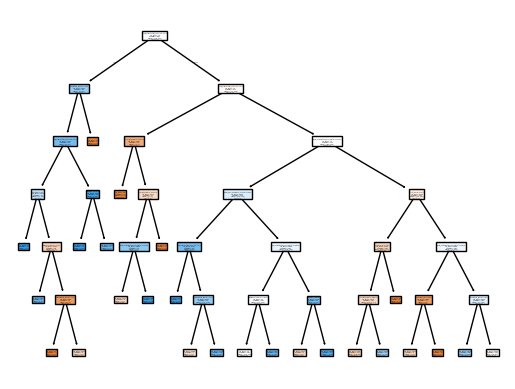

In [92]:
plot_tree(dt_clf_rscv_model, feature_names =  df.columns, class_names=["Yes","No"], filled=True)
plt.show()

### ALGORITHM 4 : RANDOM FOREST

#### MODEL TRAINING 

In [93]:
rf_clf = RandomForestClassifier()
rf_clf_model = rf_clf.fit(xtrain,ytrain)
rf_clf_model

RandomForestClassifier()

#### MODEL EVALUATION

In [94]:
ytrain_pred = rf_clf_model.predict(xtrain)
ytest_pred = rf_clf_model.predict(xtest)

In [95]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


model evaluation for training data
------------------------------------------------------------
Accuracy Score :  1.0
------------------------------------------------------------
Confusion Matrix : 
 [[396   0]
 [  0 404]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[404   0]
  [  0 396]]

 [[396   0]
  [  0 404]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       404

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

------------------------------------------------------------


In [96]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.48
------------------------------------------------------------
Confusion Matrix : 
 [[49 58]
 [46 47]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[47 46]
  [58 49]]

 [[49 58]
  [46 47]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.52      0.46      0.49       107
           1       0.45      0.51      0.47        93

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

------------------------------------------------------------


### ALGORITHM 5 : RANDOMFOREST WITH HYPERPARAMETER TUNNING 

#### MODEL TRAINING 

In [97]:
hyperparameters = {"criterion" : ["gini"],
                   "n_estimators": np.arange(5, 20),
                   "max_depth" : np.arange(5,20),
                   "min_samples_split" : np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)}
hyperparameters

{'criterion': ['gini'],
 'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}

In [98]:
rscv = RandomizedSearchCV(rf_clf_model, hyperparameters, cv = 5)
rscv = rscv.fit(xtrain, ytrain)
rscv.best_estimator_

RandomForestClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=6)

In [99]:
rf_clf = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_leaf=5,
                       min_samples_split=9)

rf_clf_rscv_model = rf_clf.fit(xtrain, ytrain)
rf_clf_rscv_model

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=9)

In [100]:
ytrain_pred = rf_clf_rscv_model.predict(xtrain)
ytest_pred = rf_clf_rscv_model.predict(xtest)

#### MODEL EVALUATION

In [101]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.87875
------------------------------------------------------------
Confusion Matrix : 
 [[349  47]
 [ 50 354]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[354  50]
  [ 47 349]]

 [[349  47]
  [ 50 354]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       396
           1       0.88      0.88      0.88       404

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800

------------------------------------------------------------


In [102]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.48
------------------------------------------------------------
Confusion Matrix : 
 [[51 56]
 [48 45]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[45 48]
  [56 51]]

 [[51 56]
  [48 45]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.52      0.48      0.50       107
           1       0.45      0.48      0.46        93

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

------------------------------------------------------------


### ALGORITHM 6 : ADABOOST

#### MODEL TRAINING

In [103]:
adb_clf = AdaBoostClassifier()
adb_clf_model = adb_clf.fit(xtrain, ytrain)
adb_clf_model

AdaBoostClassifier()

In [104]:
ytrain_pred = adb_clf_model.predict(xtrain)
ytest_pred = adb_clf_model.predict(xtest)

#### MODEL EVALUATION

In [105]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.6725
------------------------------------------------------------
Confusion Matrix : 
 [[258 138]
 [124 280]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[280 124]
  [138 258]]

 [[258 138]
  [124 280]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.65      0.66       396
           1       0.67      0.69      0.68       404

    accuracy                           0.67       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.67      0.67      0.67       800

------------------------------------------------------------


In [106]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.48
------------------------------------------------------------
Confusion Matrix : 
 [[50 57]
 [47 46]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[46 47]
  [57 50]]

 [[50 57]
  [47 46]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.52      0.47      0.49       107
           1       0.45      0.49      0.47        93

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

------------------------------------------------------------


### ALGORITHM 7 : ADABOOST WITH HYPERPARAMETER TUNNING

#### MODEL TRAINING

In [107]:
hyp = {"n_estimators" : np.arange(2,51), "learning_rate" : [0,0.1,0.001,0.1,1]}

rscv_adb = RandomizedSearchCV(adb_clf_model, hyp, cv = 5)
rscv_adb.fit(xtrain, ytrain).best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=45)

In [108]:
rscv_adb_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=42)
rscv_adb_clf_model = rscv_adb_clf.fit(xtrain, ytrain)
rscv_adb_clf_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=42)

In [109]:
ytrain_pred = rscv_adb_clf_model.predict(xtrain)
ytest_pred = rscv_adb_clf_model.predict(xtest)

#### MODEL EVALUATION

In [110]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.58875
------------------------------------------------------------
Confusion Matrix : 
 [[267 129]
 [200 204]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[204 200]
  [129 267]]

 [[267 129]
  [200 204]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.57      0.67      0.62       396
           1       0.61      0.50      0.55       404

    accuracy                           0.59       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.59      0.59      0.59       800

------------------------------------------------------------


In [111]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.535
------------------------------------------------------------
Confusion Matrix : 
 [[65 42]
 [51 42]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[42 51]
  [42 65]]

 [[65 42]
  [51 42]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.61      0.58       107
           1       0.50      0.45      0.47        93

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200

------------------------------------------------------------


### ALGORITHM 8 : GRADIENTBOOST

#### MODEL TRAINING

In [112]:
gb_clf = GradientBoostingClassifier()
gb_clf

GradientBoostingClassifier()

In [113]:
gb_clf_model = gb_clf.fit(xtrain,ytrain)
gb_clf_model

GradientBoostingClassifier()

In [114]:
ytrain_pred = gb_clf_model.predict(xtrain)
ytest_pred = gb_clf_model.predict(xtest)

#### MODEL EVALUATION

In [115]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.89
------------------------------------------------------------
Confusion Matrix : 
 [[358  38]
 [ 50 354]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[354  50]
  [ 38 358]]

 [[358  38]
  [ 50 354]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       396
           1       0.90      0.88      0.89       404

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

------------------------------------------------------------


In [116]:
print("model evaluation for Testing data")
print("-"*60)

acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.46
------------------------------------------------------------
Confusion Matrix : 
 [[46 61]
 [47 46]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[46 47]
  [61 46]]

 [[46 61]
  [47 46]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.49      0.43      0.46       107
           1       0.43      0.49      0.46        93

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200

------------------------------------------------------------


### ALGORITHM 9 : GRADIENTBOOST WITH HYPERPARAMETER TUNNING

#### MODEL TRAINING

In [117]:
hyp = {"n_estimators" : np.arange(2,51), "learning_rate" : [0,0.1,0.001,0.1,1]}

rscv_gb = RandomizedSearchCV(gb_clf_model, hyp, cv = 5)
rscv_gb.fit(xtrain, ytrain).best_estimator_

GradientBoostingClassifier(learning_rate=0.001, n_estimators=35)

In [118]:
rscv_gb_clf = GradientBoostingClassifier(learning_rate=0, n_estimators=7)
rscv_gb_clf_model = rscv_gb_clf.fit(xtrain, ytrain)
rscv_gb_clf_model

GradientBoostingClassifier(learning_rate=0, n_estimators=7)

In [119]:
ytrain_pred = rscv_adb_clf_model.predict(xtrain)
ytest_pred = rscv_adb_clf_model.predict(xtest)

#### MODEL EVALUATION

In [120]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.58875
------------------------------------------------------------
Confusion Matrix : 
 [[267 129]
 [200 204]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[204 200]
  [129 267]]

 [[267 129]
  [200 204]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.57      0.67      0.62       396
           1       0.61      0.50      0.55       404

    accuracy                           0.59       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.59      0.59      0.59       800

------------------------------------------------------------


In [121]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.535
------------------------------------------------------------
Confusion Matrix : 
 [[65 42]
 [51 42]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[42 51]
  [42 65]]

 [[65 42]
  [51 42]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.61      0.58       107
           1       0.50      0.45      0.47        93

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200

------------------------------------------------------------


### ALGORITHM 10 : XGBOOST

#### MODEL TRAINING

In [122]:
xg_clf = XGBClassifier()
xg_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
xg_clf_model = xg_clf.fit(xtrain,ytrain)
xg_clf_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [124]:
ytrain_pred = xg_clf_model.predict(xtrain)
ytest_pred = xg_clf_model.predict(xtest)

#### MODEL EVALUATION

In [125]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  1.0
------------------------------------------------------------
Confusion Matrix : 
 [[396   0]
 [  0 404]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[404   0]
  [  0 396]]

 [[396   0]
  [  0 404]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       404

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

------------------------------------------------------------


In [126]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.445
------------------------------------------------------------
Confusion Matrix : 
 [[42 65]
 [46 47]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[47 46]
  [65 42]]

 [[42 65]
  [46 47]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.48      0.39      0.43       107
           1       0.42      0.51      0.46        93

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.44       200
weighted avg       0.45      0.45      0.44       200

------------------------------------------------------------


### ALGORITHM 11 : XGBOOST WITH HYPERPARAMETER TUNNING

#### MODEL TRAINING

In [127]:
hyp = {"n_estimators" : np.arange(2,51), "learning_rate" : [0,0.1,0.001,0.1,1]}

rscv_xg = RandomizedSearchCV(xg_clf_model, hyp, cv = 5)
rscv_xg.fit(xtrain, ytrain).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [128]:
rscv_xg_clf = XGBClassifier(learning_rate=0, n_estimators=4)
rscv_xg_clf_model = rscv_xg_clf.fit(xtrain, ytrain)
rscv_xg_clf_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
ytrain_pred = rscv_xg_clf_model.predict(xtrain)
ytest_pred = rscv_xg_clf_model.predict(xtest)

#### MODEL EVALUATION

In [130]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.505
------------------------------------------------------------
Confusion Matrix : 
 [[  0 396]
 [  0 404]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[404   0]
  [396   0]]

 [[  0 396]
  [  0 404]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       396
           1       0.51      1.00      0.67       404

    accuracy                           0.51       800
   macro avg       0.25      0.50      0.34       800
weighted avg       0.26      0.51      0.34       800

------------------------------------------------------------


In [131]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)

clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.465
------------------------------------------------------------
Confusion Matrix : 
 [[  0 107]
 [  0  93]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[ 93   0]
  [107   0]]

 [[  0 107]
  [  0  93]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.47      1.00      0.63        93

    accuracy                           0.47       200
   macro avg       0.23      0.50      0.32       200
weighted avg       0.22      0.47      0.30       200

------------------------------------------------------------


### ALGORITHM 12 : KNN ALGORITHM

#### MODEL TRAINING

In [132]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf

KNeighborsClassifier()

In [133]:
knn_clf_model = knn_clf.fit(xtrain,ytrain)
knn_clf_model

KNeighborsClassifier()

In [134]:
ytrain_pred = knn_clf_model.predict(xtrain)
ytest_pred = knn_clf_model.predict(xtest)

Accuracy :  0.6875
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       396
           1       0.69      0.71      0.70       404

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800



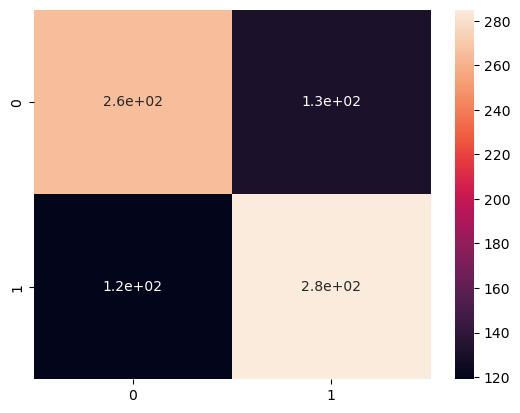

In [135]:
# TRAINING 
print("Accuracy : ",accuracy_score(ytrain,ytrain_pred))
sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot = True)
print(classification_report(ytrain,ytrain_pred))

Accuracy :  0.5
              precision    recall  f1-score   support

           0       0.54      0.50      0.51       107
           1       0.47      0.51      0.48        93

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



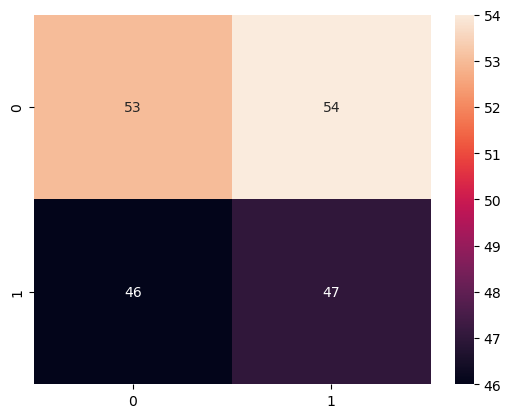

In [136]:
# TRAINING
# TRAINING 
print("Accuracy : ",accuracy_score(ytest,ytest_pred))
sns.heatmap(confusion_matrix(ytest,ytest_pred),annot = True)
print(classification_report(ytest,ytest_pred))

#### MODEL EVALUATION

In [137]:
training_accuracy = []
testing_accuracy = []


for k in np.arange(2,20):
    knn_clf = KNeighborsClassifier(k)
    knn_clf_model = knn_clf.fit(xtrain,ytrain)

   # Training Data Evaluation
    y_pred_train = knn_clf_model.predict(xtrain)

    cnf_matrix = confusion_matrix(ytrain, y_pred_train)
    print("Confusion Matrix :\n",cnf_matrix)
    print("*"*60)

    accuracy = accuracy_score(ytrain, y_pred_train)
    print("Accuracy :",accuracy)
    print("*"*60)

    clf_report = classification_report(ytrain, y_pred_train)
    print("Classification Report :\n",clf_report)
    
    training_accuracy.append(accuracy)
    
    # Testing Data Evaluation
    ypred = knn_clf_model.predict(xtest)

    cnf_matrix = confusion_matrix(ytest, ypred)
    print("Confusion Matrix :\n",cnf_matrix)
    print("*"*60)

    accuracy = accuracy_score(ytest, ypred)
    print("Accuracy :",accuracy)
    print("*"*60)

    clf_report = classification_report(ytest, ypred)
    print("Classification Report :\n",clf_report)

    testing_accuracy.append(accuracy)

Confusion Matrix :
 [[396   0]
 [198 206]]
************************************************************
Accuracy : 0.7525
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.67      1.00      0.80       396
           1       1.00      0.51      0.68       404

    accuracy                           0.75       800
   macro avg       0.83      0.75      0.74       800
weighted avg       0.83      0.75      0.74       800

Confusion Matrix :
 [[84 23]
 [66 27]]
************************************************************
Accuracy : 0.555
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.56      0.79      0.65       107
           1       0.54      0.29      0.38        93

    accuracy                           0.56       200
   macro avg       0.55      0.54      0.52 

### ALGORITHM 13 : KNN WITH HYPERPARAMETER TUNNING

#### MODEL TRAINING

In [138]:
hyp = {
    "n_neighbors":np.arange(2,20),
    "p" : [1,2]
}

rscv_knn_clf_model = RandomizedSearchCV(knn_clf_model,hyp,cv = 6)
rscv_knn_clf_model.fit(xtrain,ytrain)
rscv_knn_clf_model.best_estimator_

KNeighborsClassifier()

In [139]:
knn_clf = KNeighborsClassifier(n_neighbors=14)
knn_clf

KNeighborsClassifier(n_neighbors=14)

In [140]:
knn_clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=14)

#### MODEL EVALUATION

In [141]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(xtrain)

cnf_matrix = confusion_matrix(ytrain, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytrain, y_pred_train)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytrain, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[289 107]
 [194 210]]
************************************************************
Accuracy : 0.62375
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.73      0.66       396
           1       0.66      0.52      0.58       404

    accuracy                           0.62       800
   macro avg       0.63      0.62      0.62       800
weighted avg       0.63      0.62      0.62       800



In [142]:
# Testing Data Evaluation
ypred = knn_clf.predict(xtest)

cnf_matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytest, ypred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytest, ypred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[68 39]
 [55 38]]
************************************************************
Accuracy : 0.53
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.55      0.64      0.59       107
           1       0.49      0.41      0.45        93

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.53      0.52       200



Text(0.5, 0, 'K Values')

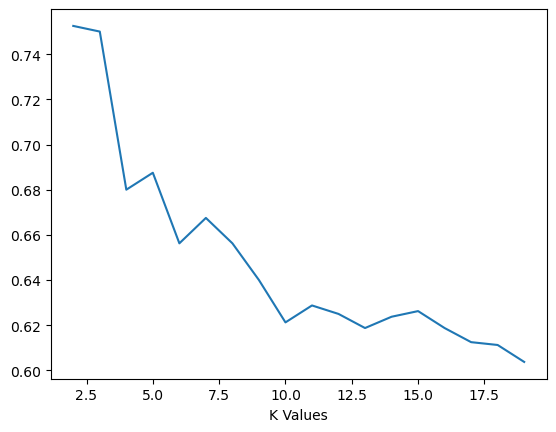

In [143]:
k = np.arange(2,20)
sns.lineplot(x=k,y=training_accuracy)
plt.xlabel("K Values")

Text(0.5, 0, 'K Values')

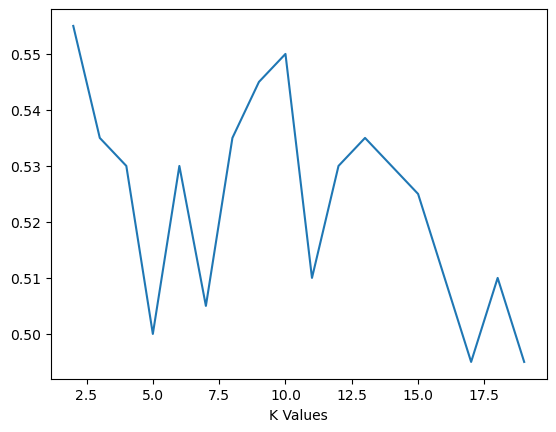

In [144]:
k = np.arange(2,20)
sns.lineplot(x=k,y=testing_accuracy)
plt.xlabel("K Values")

### ALGORITHM 14 : SUPPORT VECTOR METHOD (SVM)

#### MODEL TRAINING

In [145]:
svc = SVC()
svm_model = svc.fit(xtrain,ytrain)
svm_model

SVC()

In [146]:
ytrain_pred = svm_model.predict(xtrain)
ytest_pred = svm_model.predict(xtest)

#### MODEL EVALUATION

In [147]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(xtrain)

cnf_matrix = confusion_matrix(ytrain, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytrain, y_pred_train)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytrain, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[289 107]
 [194 210]]
************************************************************
Accuracy : 0.62375
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.73      0.66       396
           1       0.66      0.52      0.58       404

    accuracy                           0.62       800
   macro avg       0.63      0.62      0.62       800
weighted avg       0.63      0.62      0.62       800



In [148]:
# Testing Data Evaluation
ypred = knn_clf.predict(xtest)

cnf_matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytest, ypred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytest, ypred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[68 39]
 [55 38]]
************************************************************
Accuracy : 0.53
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.55      0.64      0.59       107
           1       0.49      0.41      0.45        93

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.53      0.52       200



#### SAVE BEST MODEL IN PICKLE FILE

In [149]:
import pickle

In [150]:
with open("ChurnAnalysis_Model.pkl","wb") as f:
    pickle.dump(rscv_adb_clf_model,f)

In [151]:
test_data = xtrain.head(1)
test_data

Age  Gender  Account_Tenure  Account_Type  Balance_Amount  \
504   50       0              25             0            8935   

     Num_Transactions_per_Month  Avg_Transaction_Value  Credit_Score  \
504                          43                  203.0           633   

     Has_Loan  Num_Complaints_Last_Year  Satisfaction_Score  \
504         1                         0                   2   

     Num_Calls_Customer_Service  Resolved_Issues_Percentage  
504                           0                          84

In [152]:
with open("ChurnAnalysis_Model.pkl","rb") as f:
    Final_Model = pickle.load(f)

In [153]:
Final_Model.predict(test_data)[0]

0

In [154]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Account_Tenure', 'Account_Type',
       'Balance_Amount', 'Num_Transactions_per_Month', 'Avg_Transaction_Value',
       'Credit_Score', 'Has_Loan', 'Num_Complaints_Last_Year',
       'Satisfaction_Score', 'Num_Calls_Customer_Service',
       'Resolved_Issues_Percentage', 'Churn_Probability'],
      dtype='object')

In [155]:
def MyFunction(Customer_ID, Age, Gender, Account_Tenure, Account_Type, Balance_Amount, Num_Transactions_per_Month, Avg_Transaction_Value, Credit_Score, Has_Loan, Num_Complaints_Last_Year, Satisfaction_Score, Num_Calls_Customer_Service, Resolved_Issues_Percentage):
    new_data = pd.DataFrame({'Customer_ID':[Customer_ID],
                             'Age':[Age], 
                             'Gender':[Gender],
                             'Account_Tenure':[Account_Tenure],
                             'Account_Type':[Account_Type],
                             'Balance_Amount':[Balance_Amount],
                             'Num_Transactions_per_Month':[Num_Transactions_per_Month],
                             'Avg_Transaction_Value':[Avg_Transaction_Value],
                             'Credit_Score':[Credit_Score], 
                             'Has_Loan':[Has_Loan], 
                             'Num_Complaints_Last_Year':[Num_Complaints_Last_Year],
                             'Satisfaction_Score':[Satisfaction_Score],
                             'Num_Calls_Customer_Service':[Num_Calls_Customer_Service],
                             'Resolved_Issues_Percentage':[Resolved_Issues_Percentage]})
    print("New Data\n",new_data)

    with open("ChurnAnalysis_Model.pkl","rb") as f:
        Final_Model = pickle.load(f)
    
    if Final_Model.predict(test_data)[0] == 0:
        print("Predicted Churn Probability : Yes")

    else :
        print("Predicted Churn Probability : No")

In [156]:
MyFunction(5000,	24,	0,	22,	1,	43703,	89,	485.00,	749,	0,	8,	2,	8,	72)

New Data
    Customer_ID  Age  Gender  Account_Tenure  Account_Type  Balance_Amount  \
0         5000   24       0              22             1           43703   

   Num_Transactions_per_Month  Avg_Transaction_Value  Credit_Score  Has_Loan  \
0                          89                  485.0           749         0   

   Num_Complaints_Last_Year  Satisfaction_Score  Num_Calls_Customer_Service  \
0                         8                   2                           8   

   Resolved_Issues_Percentage  
0                          72  
Predicted Churn Probability : Yes


In [157]:
MyFunction(4005	,33	,0	,16	,0	,30317	,58	,513.00	,354	,1	,6	,2	,6	,55)

New Data
    Customer_ID  Age  Gender  Account_Tenure  Account_Type  Balance_Amount  \
0         4005   33       0              16             0           30317   

   Num_Transactions_per_Month  Avg_Transaction_Value  Credit_Score  Has_Loan  \
0                          58                  513.0           354         1   

   Num_Complaints_Last_Year  Satisfaction_Score  Num_Calls_Customer_Service  \
0                         6                   2                           6   

   Resolved_Issues_Percentage  
0                          55  
Predicted Churn Probability : Yes


In [2]:
%%writefile Vaishnavi_BankCustomerChurnAnalysis_EDA_app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np

# Load the trained model
with open("ChurnAnalysis_Model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Streamlit UI
st.title("Customer Churn Prediction App")

# Input fields for the user to enter customer details
customer_id = st.text_input("Customer ID")
age = st.number_input("Age", min_value=18, max_value=100, value=30)
gender = st.selectbox("Gender", ["Male", "Female"])
account_tenure = st.number_input("Account Tenure (Years)", min_value=0, max_value=50, value=5)
account_type = st.selectbox("Account Type", ["Savings", "Current"])
balance_amount = st.number_input("Balance Amount", min_value=0.0, value=5000.0)
num_transactions = st.number_input("Number of Transactions per Month", min_value=0, value=10)
avg_transaction_value = st.number_input("Average Transaction Value", min_value=0.0, value=100.0)
credit_score = st.number_input("Credit Score", min_value=300, max_value=900, value=650)
has_loan = st.selectbox("Has Loan?", ["Yes", "No"])
num_complaints = st.number_input("Number of Complaints Last Year", min_value=0, value=1)
satisfaction_score = st.slider("Satisfaction Score", min_value=1, max_value=10, value=5)
num_calls_customer_service = st.number_input("Number of Calls to Customer Service", min_value=0, value=2)
resolved_issues_percentage = st.slider("Resolved Issues Percentage", min_value=0, max_value=100, value=80)

# Convert categorical data to numerical
gender = 1 if gender == "Male" else 0
account_type = 1 if account_type == "Current" else 0
has_loan = 1 if has_loan == "Yes" else 0

# Prepare input for model
input_data = pd.DataFrame({
    'Age': [age],
    'Gender': [gender],
    'Account_Tenure': [account_tenure],
    'Account_Type': [account_type],
    'Balance_Amount': [balance_amount],
    'Num_Transactions_per_Month': [num_transactions],
    'Avg_Transaction_Value': [avg_transaction_value],
    'Credit_Score': [credit_score],
    'Has_Loan': [has_loan],
    'Num_Complaints_Last_Year': [num_complaints],
    'Satisfaction_Score': [satisfaction_score],
    'Num_Calls_Customer_Service': [num_calls_customer_service],
    'Resolved_Issues_Percentage': [resolved_issues_percentage]
})

# Predict churn
if st.button("Predict Churn"):
    prediction = model.predict(input_data)[0]
    result = "Likely to Churn" if prediction == 1 else "Not Likely to Churn"
    st.subheader(f"Prediction: {result}")


Writing Vaishnavi_BankCustomerChurnAnalysis_EDA_app.py
